In [31]:
from sonoma_dates import epochNums, epochDates, epochDays
import pandas as pd
import seaborn as sns
import numpy as np

# Preliminaries

### Load Date Information
- Loads the date time information in sonoma_dates.
- Here we have saved it as a .py file and directly imported the information as python variables

In [32]:
epochNums = [int(x) for x in epochNums[1:-2].split(' ')]
epochDays = [float(x) for x in epochDays[1:-2].split(' ')]

In [33]:
from datetime import datetime 

date_start = "Tue Apr 27 17:10:00 2004"
date_end  = "Fri Jun 11 20:25:00 2004"


def conv_date_from_str(eg_date):
    date_vars = eg_date.split(' ')
    date_vars = [x for x in date_vars if x!=""]

    month_conv = {'Apr':4,
                  'May':5,
                  'Jun':6}

    dow = date_vars[0]
    month = month_conv[date_vars[1]]
    day = date_vars[2]
    time = date_vars[3]
    year = date_vars[4]

    hour = time.split(":")[0]
    minutes = time.split(":")[1]
    seconds = time.split(":")[2]


    # datetime(year, month, day, hour, minute, second, microsecond)
    out_datetime= datetime(int(year), month, int(day), int(hour), int(minutes), int(seconds))
    
    return out_datetime

for dd in epochDates.split('\' \'')[1:-1]:
    conv_date_from_str(dd)
date_middle = [conv_date_from_str(dd) for dd in epochDates.split('\' \'')[1:-1]]

epoch_datetimes = [conv_date_from_str(date_start)] + date_middle + [conv_date_from_str(date_end)]

In [34]:
epoch_data = pd.DataFrame([epochNums, epochDays, epoch_datetimes]).T
epoch_data.columns = ['Epoch_No','Epoch_Days','Epoch_datetime']

In [35]:
epoch_data.head()

Epoch_No    Epoch_Days      Epoch_datetime
0        1  12536.006944 2004-04-27 17:10:00
1        2  12536.010417 2004-04-27 17:15:00
2        3  12536.013889 2004-04-27 17:20:00
3        4  12536.017361 2004-04-27 17:25:00
4        5  12536.020833 2004-04-27 17:30:00

In [36]:
#epoch_data.to_csv('data/epoch_data_processed.csv', index=False)

The resulting dataframe epoch_Data tell us three things:
1. Epoch no: The corresponding epoch index which is the same as in the sonoma_log, net and all data
2. Epoch_Days: The time measured in days since some starting
3. Epoch_datetime: The actual  date and time that the measurement was recoreded

In [37]:
sonoma_all = pd.read_csv('Data/sonoma-data-all.csv')
sonoma_all.head()

result_time   epoch   nodeid   parent   voltage   depth  \
0  2004-05-07 18:24:58.666424    2812      119        5     220.0       2   
1  2004-05-07 18:24:58.805974    2812      105      129     223.0       3   
2  2004-05-07 18:24:59.075427    2812      113      118     222.0       4   
3  2004-05-07 18:24:59.355354    2812      138        5     223.0       2   
4  2004-05-07 18:24:59.675467    2812      127       42     222.0       3   

    humidity   humid_temp   humid_adj   hamatop   hamabot  
0    95.3567      12.6678     92.1444   4218.18       0.0  
1    96.9957      12.6482     93.7072   9363.23       0.0  
2    94.5031      12.4522     91.2718   9405.41       0.0  
3    96.8828      12.6580     93.6018   9363.23       0.0  
4    97.8044      12.3836     94.4090   4702.70       0.0

In [38]:
epoch_data.head()

Epoch_No    Epoch_Days      Epoch_datetime
0        1  12536.006944 2004-04-27 17:10:00
1        2  12536.010417 2004-04-27 17:15:00
2        3  12536.013889 2004-04-27 17:20:00
3        4  12536.017361 2004-04-27 17:25:00
4        5  12536.020833 2004-04-27 17:30:00

# Question 2 Data Cleaning

### Preliminaries

- sonoma_net: Data extracted from network (Cloud?)
- sonoma_log: Data extracted from onboard memory 

In [39]:
sonoma_log = pd.read_csv('Data/sonoma-data-log.csv')
sonoma_net = pd.read_csv('Data/sonoma-data-net.csv')

In [40]:
print(len(sonoma_net))
sonoma_net.head()

114980


result_time   epoch   nodeid   parent   voltage   depth  \
0  2004-05-07 18:24:58.666424    2812      119        5       220       2   
1  2004-05-07 18:24:58.805974    2812      105      129       223       3   
2  2004-05-07 18:24:59.075427    2812      113      118       222       4   
3  2004-05-07 18:24:59.355354    2812      138        5       223       2   
4  2004-05-07 18:24:59.675467    2812      127       42       222       3   

    humidity   humid_temp   humid_adj   hamatop   hamabot  
0    95.3567      12.6678     92.1444   4218.18       0.0  
1    96.9957      12.6482     93.7072   9363.23       0.0  
2    94.5031      12.4522     91.2718   9405.41       0.0  
3    96.8828      12.6580     93.6018   9363.23       0.0  
4    97.8044      12.3836     94.4090   4702.70       0.0

In [41]:
print(len(sonoma_log))
sonoma_log.head()

301056


result_time   epoch   nodeid   parent   voltage   depth   humidity  \
0  2004-11-10 14:25:00       3        2    65535   2.88311     255    43.8183   
1  2004-11-10 14:25:00       4        2    65535   2.88311     255    44.7798   
2  2004-11-10 14:25:00       5        2    65535   2.88311     255    45.7695   
3  2004-11-10 14:25:00       6        2    65535   2.88311     255    46.3609   
4  2004-11-10 14:25:00       7        2    65535   2.88311     255    46.0326   

    humid_temp   humid_adj   hamatop   hamabot  
0      22.4090     43.5236       0.0       0.0  
1      22.2032     44.4552       0.0       0.0  
2      22.0660     45.4219       0.0       0.0  
3      22.0072     46.0020       0.0       0.0  
4      21.9680     45.6714       0.0       0.0

In [42]:
print("Total Amount of Data: ", len(sonoma_net) + len(sonoma_log))

Total Amount of Data:  416036


We have a total of 416036 datapoints across the sonoma_net and sonoma_log dataset

In [43]:
sonoma_log.columns

Index(['result_time', ' epoch', ' nodeid', ' parent', ' voltage', ' depth',
       ' humidity', ' humid_temp', ' humid_adj', ' hamatop', ' hamabot'],
      dtype='object')

## 2 a) (and c)

We plot histograms of the variables in sonoma_net and sonoma_log. This highlights two issues.
- The ranges are different across sonoma_net and sonoma_log
- The scales for some variables in sonoma_net and sonoma_log are different from the paper

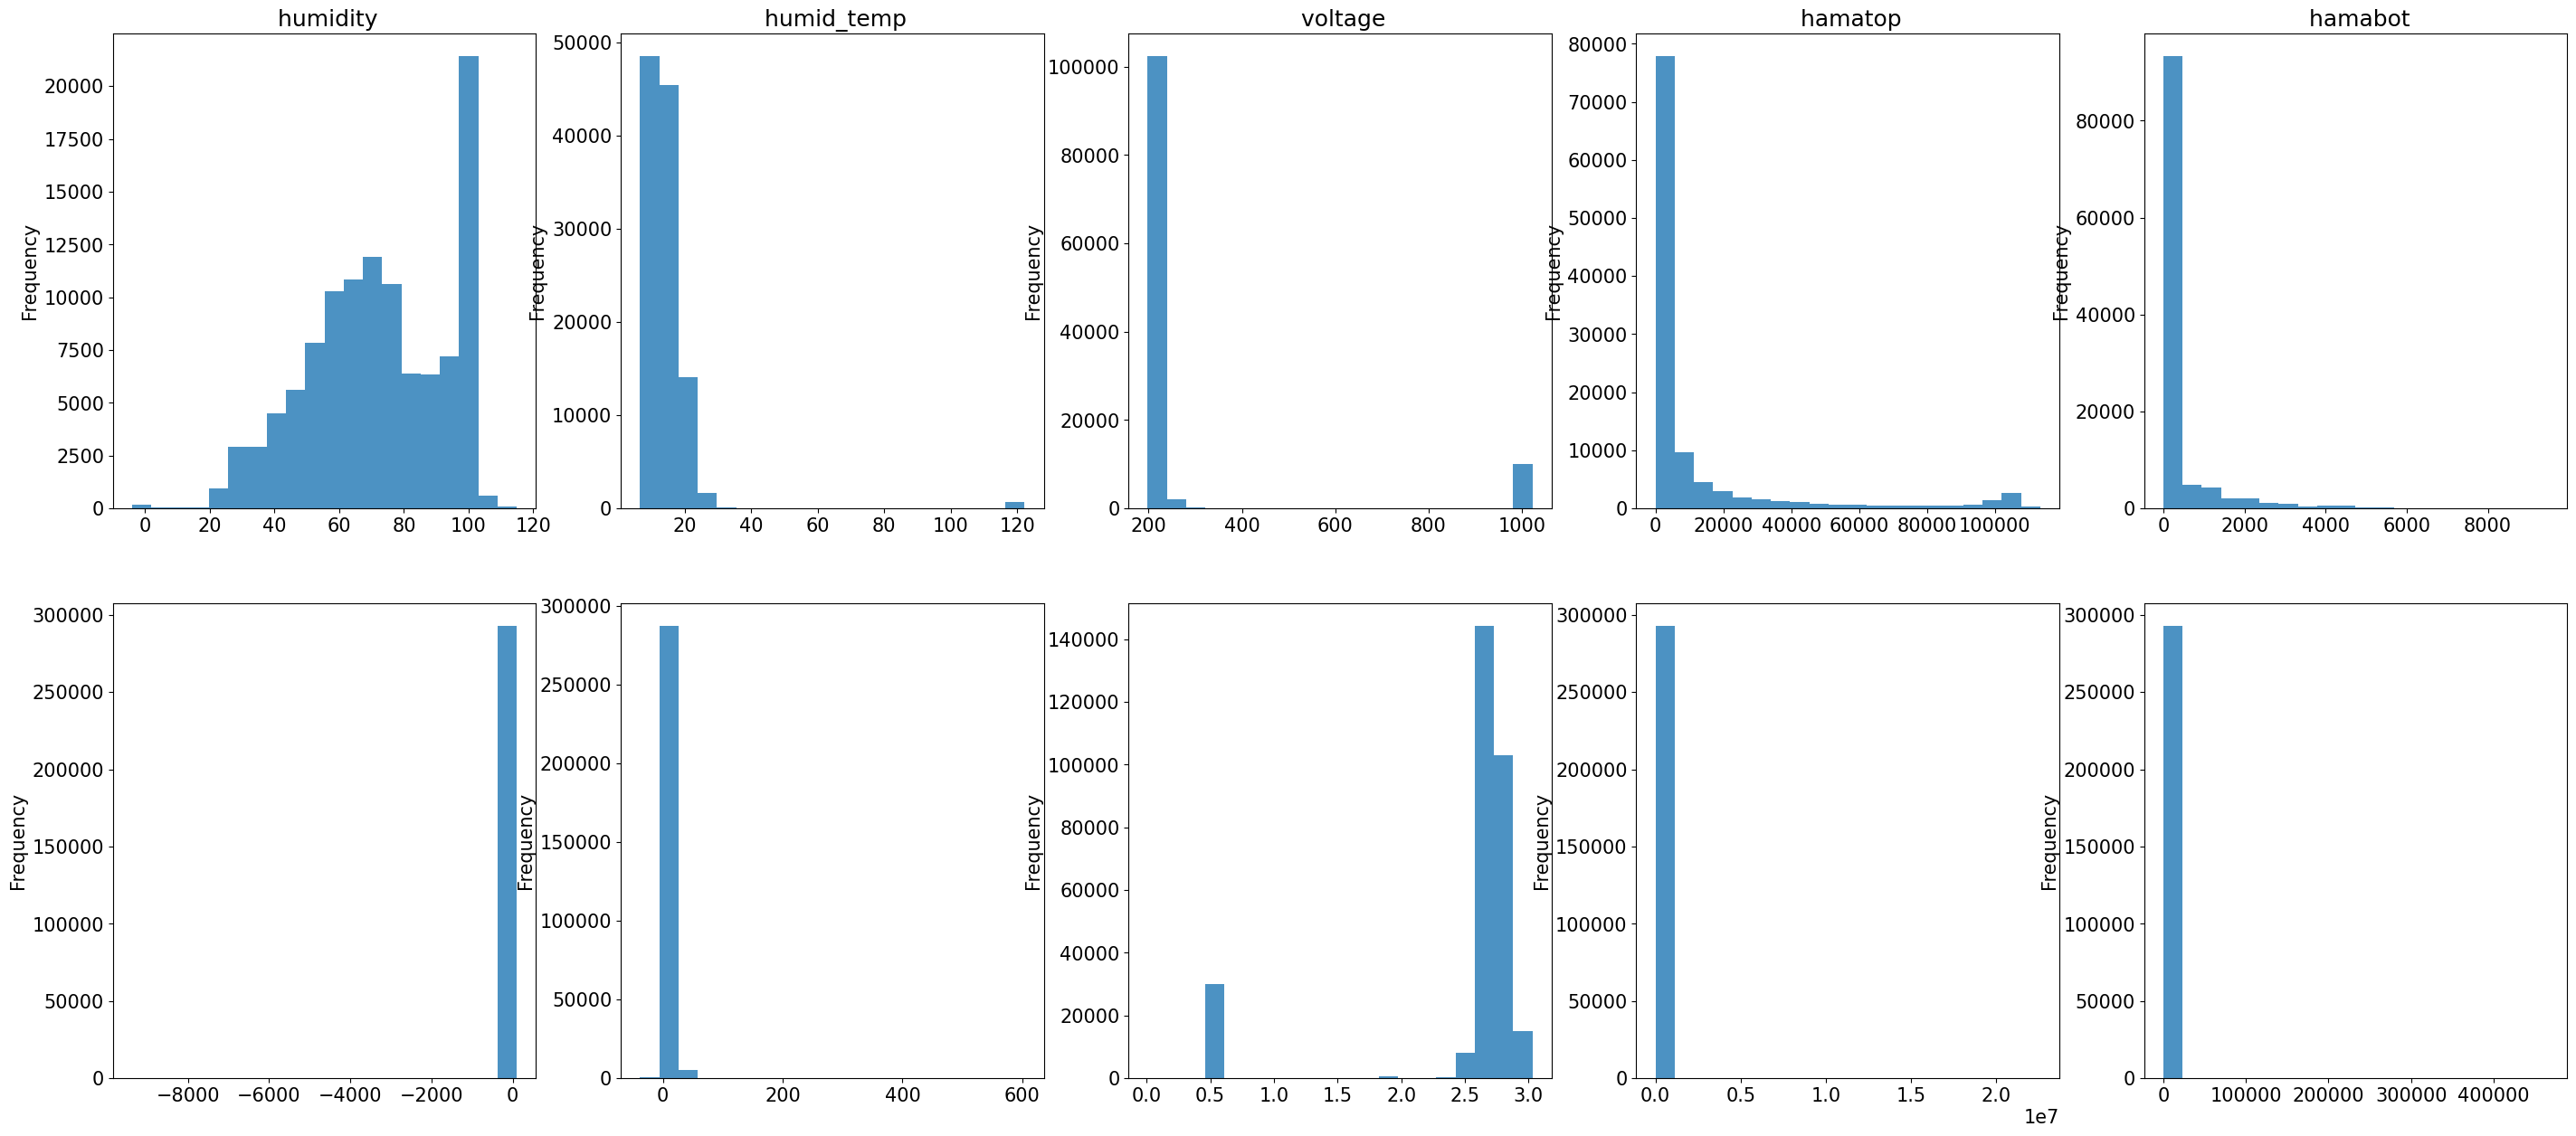

In [44]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
%matplotlib inline

variable_list = [' humidity',
                 ' humid_temp', ' voltage', ' hamatop', ' hamabot']

fig, ax = plt.subplots(2,5, figsize=(35,15))
for i,var in enumerate(variable_list):
    
    sonoma_net[var].plot.hist(ax=ax[0,i], alpha=0.8, color='tab:blue',bins=20)
    sonoma_log[var].plot.hist(ax=ax[1,i], alpha=0.8, color='tab:blue',bins=20)
    ax[0,i].set_title(var)
    

- Looking at raw histogram, we see significant differences in ranges for:
- humidity
- humid_tmep
- humid_adj

In [45]:
sonoma_net[variable_list].describe().loc[['mean','std','25%','75%']].T

mean           std       25%        75%
 humidity       72.123596     21.327203   57.0984    92.6076
 humid_temp     14.276954      9.840161   10.1198    16.0880
 voltage       292.793190    227.220706  218.0000   227.0000
 hamatop     11521.654151  24962.815555    0.0000  8436.3600
 hamabot       271.948958    805.305179    0.0000     0.0000

In [46]:
sonoma_net[variable_list].median()

 humidity       72.0543
 humid_temp     12.9814
 voltage       223.0000
 hamatop         0.0000
 hamabot         0.0000
dtype: float64

In [47]:
sonoma_log[variable_list].describe().loc[['mean','std','25%','75%']].T

mean           std       25%         75%
 humidity       61.414470     31.069201  40.02680    80.19970
 humid_temp     15.022345      5.685116  10.86460    18.81240
 voltage         2.506449      0.646910   2.62796     2.77533
 hamatop     10870.344669  48422.142001   0.00000  6762.33000
 hamabot       245.535843   1180.337889   0.00000     0.00000

In [48]:
sonoma_log[variable_list].median()

 humidity      61.58290
 humid_temp    14.71600
 voltage        2.69964
 hamatop        0.00000
 hamabot        0.00000
dtype: float64

- Comparing the actual statistics, we can see that the quantiles between both sets are very similar.
- Thus the difference in ranges could be due to outliers in the dataset. 
- These outliers see to be in sonoma_log which generally has more extreme values compared to sonoma_net

- We first convert the ranges of hamatop and hamabot
- To do so we divide by 54 
- We name the resulting columns incident PAR and and reflected PAR respectively to match their names in the paper

### Converting to PAR

In [49]:
sonoma_net['Incident_PAR'] = sonoma_net[' hamatop']/54
sonoma_net['Reflected_PAR'] = sonoma_net[' hamabot']/54

sonoma_log['Incident_PAR'] = sonoma_log[' hamatop']/54
sonoma_log['Reflected_PAR'] = sonoma_log[' hamabot']/54

### Converting to Voltage

Voltage Conversion
- https://learn.sparkfun.com/tutorials/analog-to-digital-conversion/relating-adc-value-to-voltage

- Doesnt work for some reason

<AxesSubplot:>

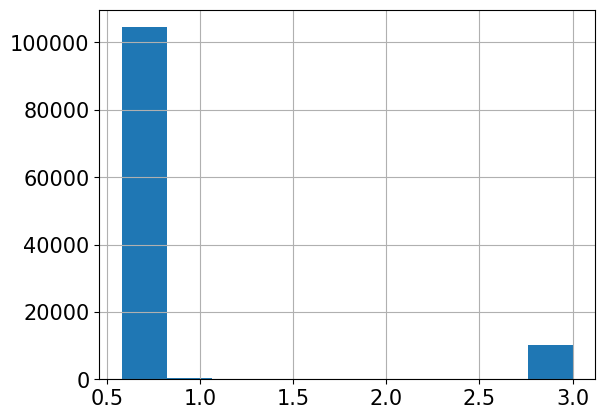

In [50]:
resolution_of_adc = np.max(sonoma_net[' voltage'])
max_voltage = np.max(sonoma_log[' voltage'])

sonoma_net[' voltage'] = sonoma_net[' voltage'].apply(lambda x: x/(resolution_of_adc/3))
sonoma_net[' voltage'].hist()

# Calculate Post Unit Transform Differences

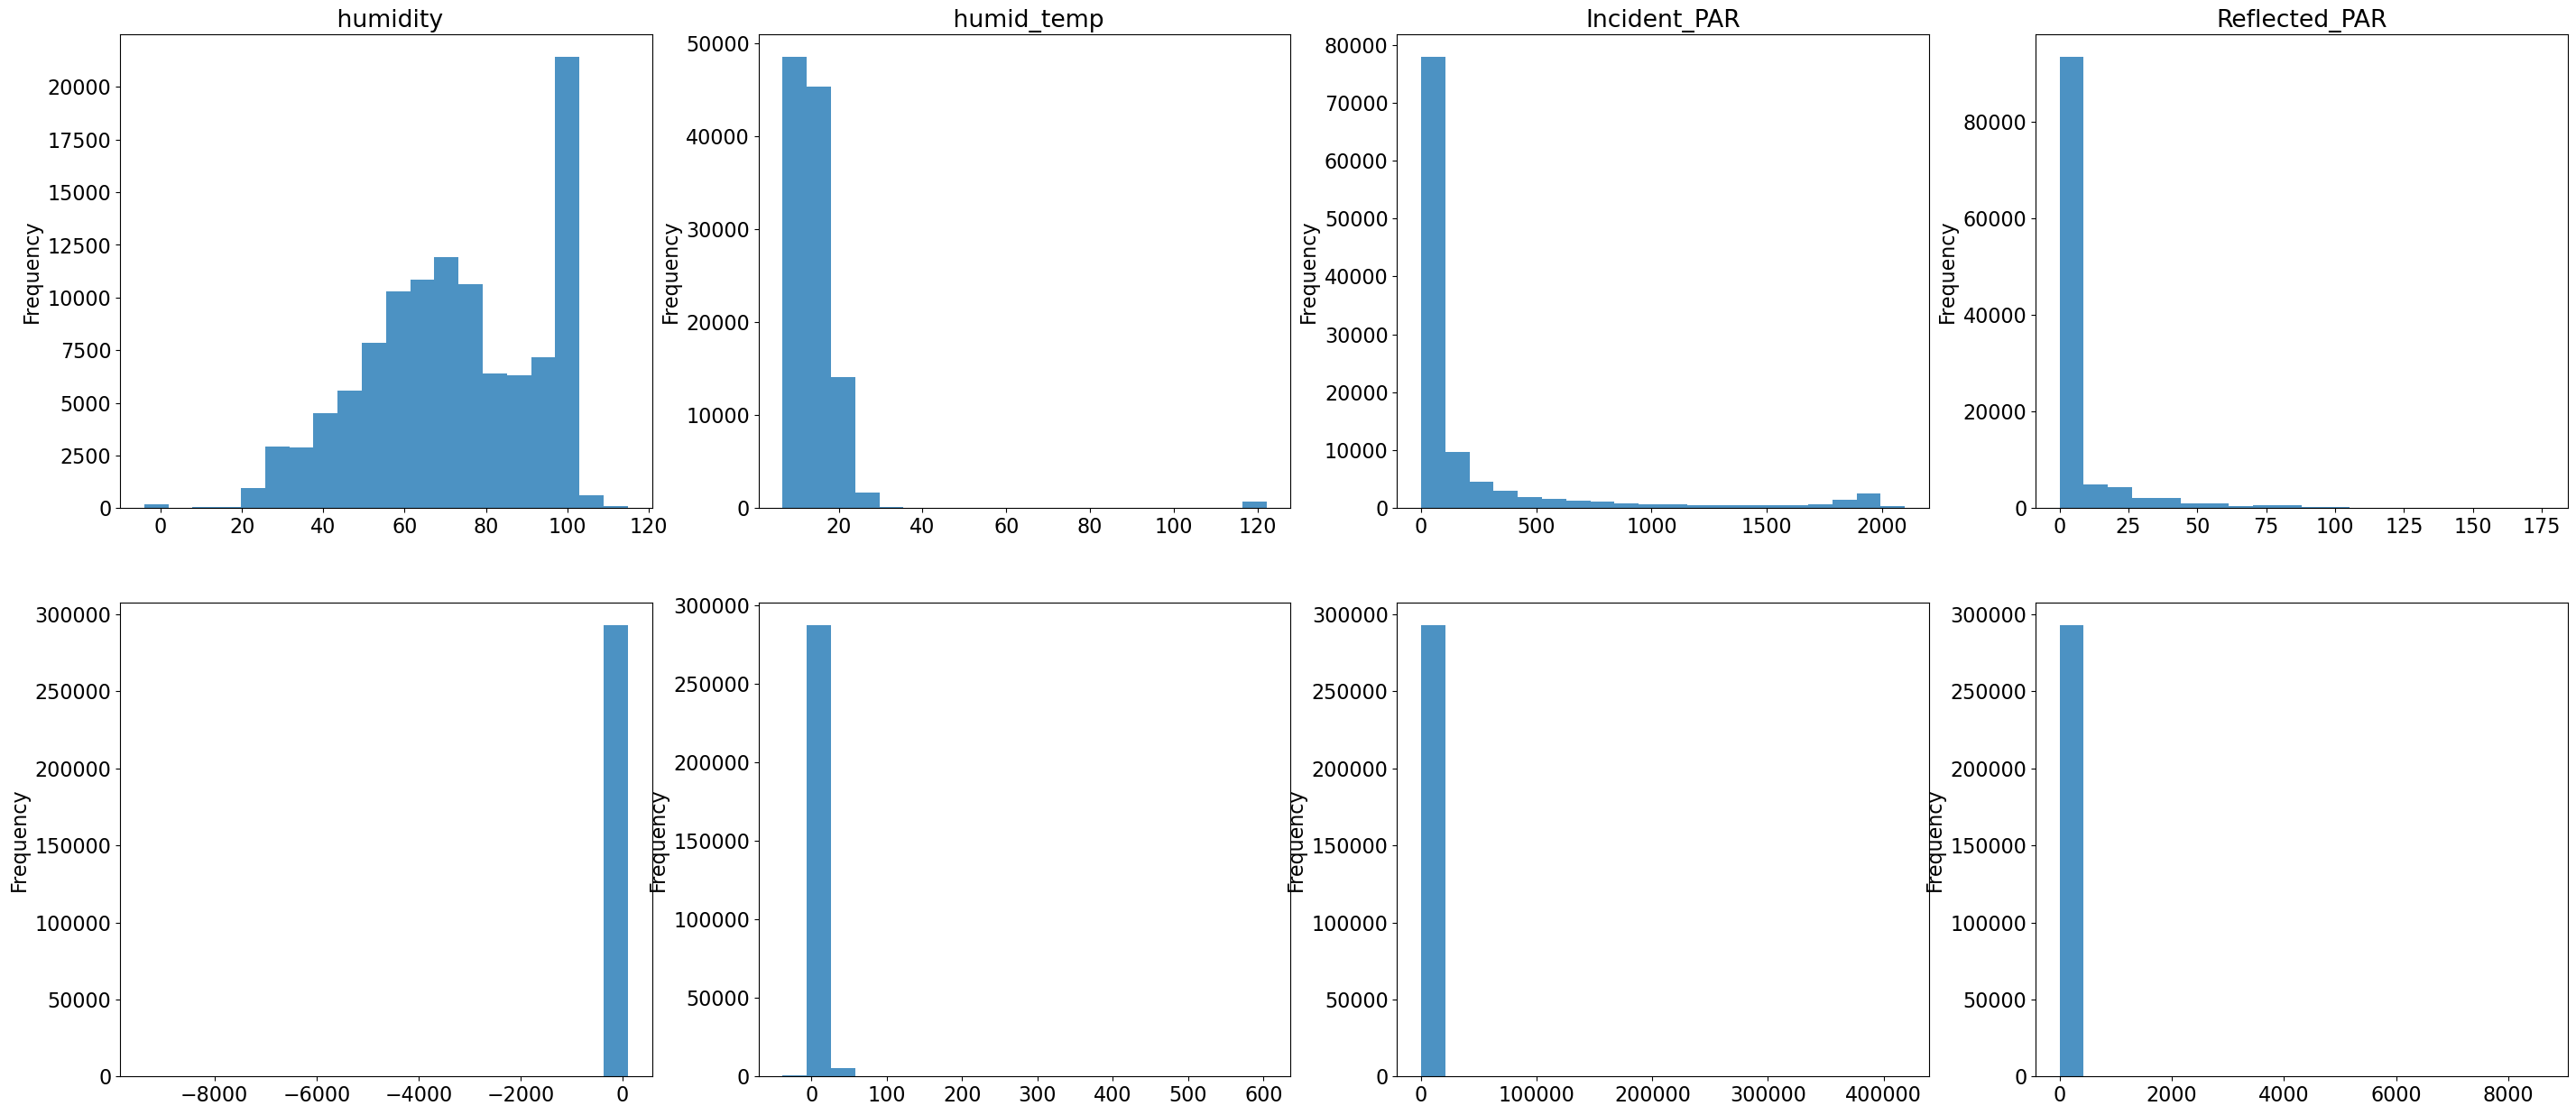

In [51]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
%matplotlib inline

variable_list = [' humidity',
                 ' humid_temp', 'Incident_PAR', 'Reflected_PAR']

fig, ax = plt.subplots(2,4, figsize=(35,15))
for i,var in enumerate(variable_list):
    
    sonoma_net[var].plot.hist(ax=ax[0,i], alpha=0.8, color='tab:blue',bins=20)
    sonoma_log[var].plot.hist(ax=ax[1,i], alpha=0.8, color='tab:blue',bins=20)
    ax[0,i].set_title(var)

In [22]:
sonoma_net[variable_list].describe().loc[['mean','std','25%','75%']].T

mean         std        25%         75%
 humidity       72.123596   21.327203  57.098400   92.607600
 humid_temp     14.276954    9.840161  10.119800   16.088000
 voltage         0.858631    0.666336   0.639296    0.665689
Incident_PAR   213.363966  462.274362   0.000000  156.228889
Reflected_PAR    5.036092   14.913059   0.000000    0.000000

In [25]:
sonoma_net[variable_list].median()

 humidity        72.054300
 humid_temp      12.981400
 voltage          0.653959
Incident_PAR      0.000000
Reflected_PAR     0.000000
dtype: float64

In [23]:
sonoma_log[variable_list].describe().loc[['mean','std','25%','75%']].T

mean         std       25%         75%
 humidity       61.414470   31.069201  40.02680   80.199700
 humid_temp     15.022345    5.685116  10.86460   18.812400
 voltage         2.506449    0.646910   2.62796    2.775330
Incident_PAR   201.302679  896.706333   0.00000  125.228333
Reflected_PAR    4.546960   21.858109   0.00000    0.000000

In [24]:
sonoma_log[variable_list].median()

 humidity        61.58290
 humid_temp      14.71600
 voltage          2.69964
Incident_PAR      0.00000
Reflected_PAR     0.00000
dtype: float64

We can see that the variables have a much better range now


## 2 b) Checking for missing data

In [190]:
missing_data_net[' nodeid'].value_counts()

122    4262
Name:  nodeid, dtype: int64

In [192]:
miss_data_log[' nodeid'].value_counts()

122    5309
15     1595
128    1366
Name:  nodeid, dtype: int64

In [26]:
import numpy as np
missing_data_net = sonoma_net[np.any(sonoma_net.isna(),1)]
print("No Missing Data from network data: ",len(missing_data_net))

miss_data_log = sonoma_log[np.any(sonoma_log.isna(),1)]
print("No Missing Data from log data: ",len(miss_data_log))

# Remove
sonoma_net_no_miss = sonoma_net[~np.any(sonoma_net.isna(),1)]
sonoma_log_no_miss = sonoma_log[~np.any(sonoma_log.isna(),1)]

print('\nNo. Network Data After Removing Missing: ', len(sonoma_net_no_miss))
print("No. Log Data After Removing Missing: ", len(sonoma_log_no_miss))

print('\nPct Missing Net: ', 100*len(missing_data_net)/len(sonoma_net))
print("Pct Missing Log: ", 100*len(miss_data_log)/len(sonoma_log))

No Missing Data from network data:  4262
No Missing Data from log data:  8270

No. Network Data After Removing Missing:  110718
No. Log Data After Removing Missing:  292786

Pct Missing Net:  3.706731605496608
Pct Missing Log:  2.7469972363945576


In [198]:
missing_data_net[' nodeid'].value_counts()

122    4262
Name:  nodeid, dtype: int64

In [199]:
miss_data_log[' nodeid'].value_counts()

122    5309
15     1595
128    1366
Name:  nodeid, dtype: int64

We note that majority of the missing data comes from node 122, and some missing are generated from 15 and 128.

## 2 c) Adding Location Data
- Add in location data from mote-location.txt

In [200]:
# Loads the information
mote_location = pd.read_csv('Data/mote-location-data.txt',sep='\t',skiprows=1,header=None)

# Loads the headers
mote_location_head = pd.read_csv('Data/mote-location-data.txt',sep='\t',header=0).columns

# Clean the headers
col_names_mote_location = [x for x in mote_location_head[0].split(' ') if x!='']

# Set the column names
mote_location.columns = col_names_mote_location
mote_location.head()

ID  Height Direc  Dist  Tree
0  24    10.5   WSW   0.1  edge
1  20    12.7   WSW   0.1  edge
2  27    14.9   WSW   0.1  edge
3  38    16.6   WSW   0.1  edge
4   0    16.9    NW   0.1  edge

In [201]:
print('Size mote-location table: ', len(mote_location))

Size mote-location table:  80


Checking if mote location is clean - ID should be a unique variable


In [29]:
np.all(mote_location['ID'].value_counts() == 1)

True

In [218]:
node_observed = set(list(sonoma_net[' nodeid'].unique()) + list(sonoma_log[' nodeid'].unique()))
node_in_mote = list(mote_location['ID'].unique())

unlisted_nodes = [x for x in node_observed if x not in node_in_mote]
listed_nodes = [x for x in node_observed if x in node_in_mote]

print("No Location data for Nodes: ", unlisted_nodes)

No Location data for Nodes:  [135, 65535, 100]


Merge tables together this is a left (main table) join  to the mote locations

In [30]:
sonoma_net = sonoma_net_no_miss.merge(mote_location,
                how='left',
                left_on=' nodeid',
                right_on='ID')

sonoma_log = sonoma_log_no_miss.merge(mote_location,
                how='left',
                left_on=' nodeid',
                right_on='ID')

## 2 d) Finding Outliers

Firstly Combine Datasets

In [31]:
sonoma_net['source'] = 'net'
sonoma_log['source'] = 'log'
sonoma_all = pd.concat([sonoma_net, sonoma_log])

Plot Histogram Starting Point

In [32]:
variable_list

[' humidity', ' humid_temp', ' voltage', 'Incident_PAR', 'Reflected_PAR']

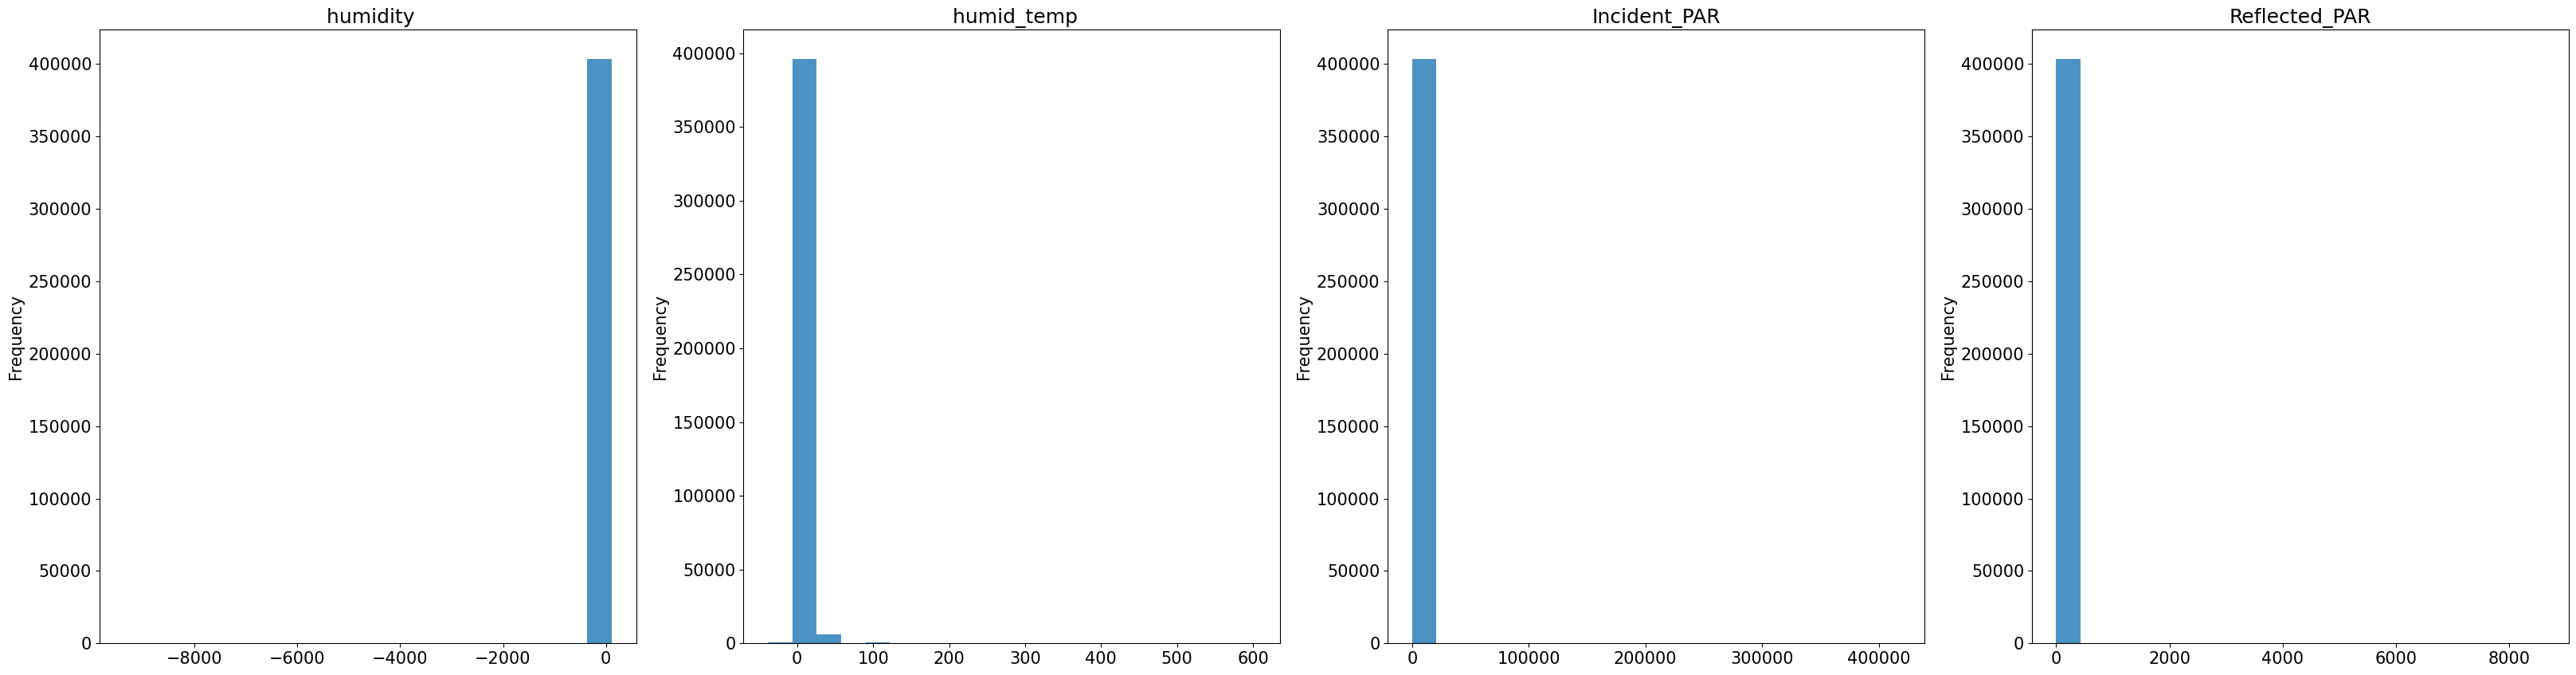

In [33]:
fig, ax = plt.subplots(1,4, figsize=(40,10))
variable_list = [' humidity', ' humid_temp', 'Incident_PAR', 'Reflected_PAR']
for i,var in enumerate(variable_list):

    sonoma_all[var].plot.hist(ax=ax[i], alpha=0.8, color='tab:blue',bins=20)
    ax[i].set_title(var)

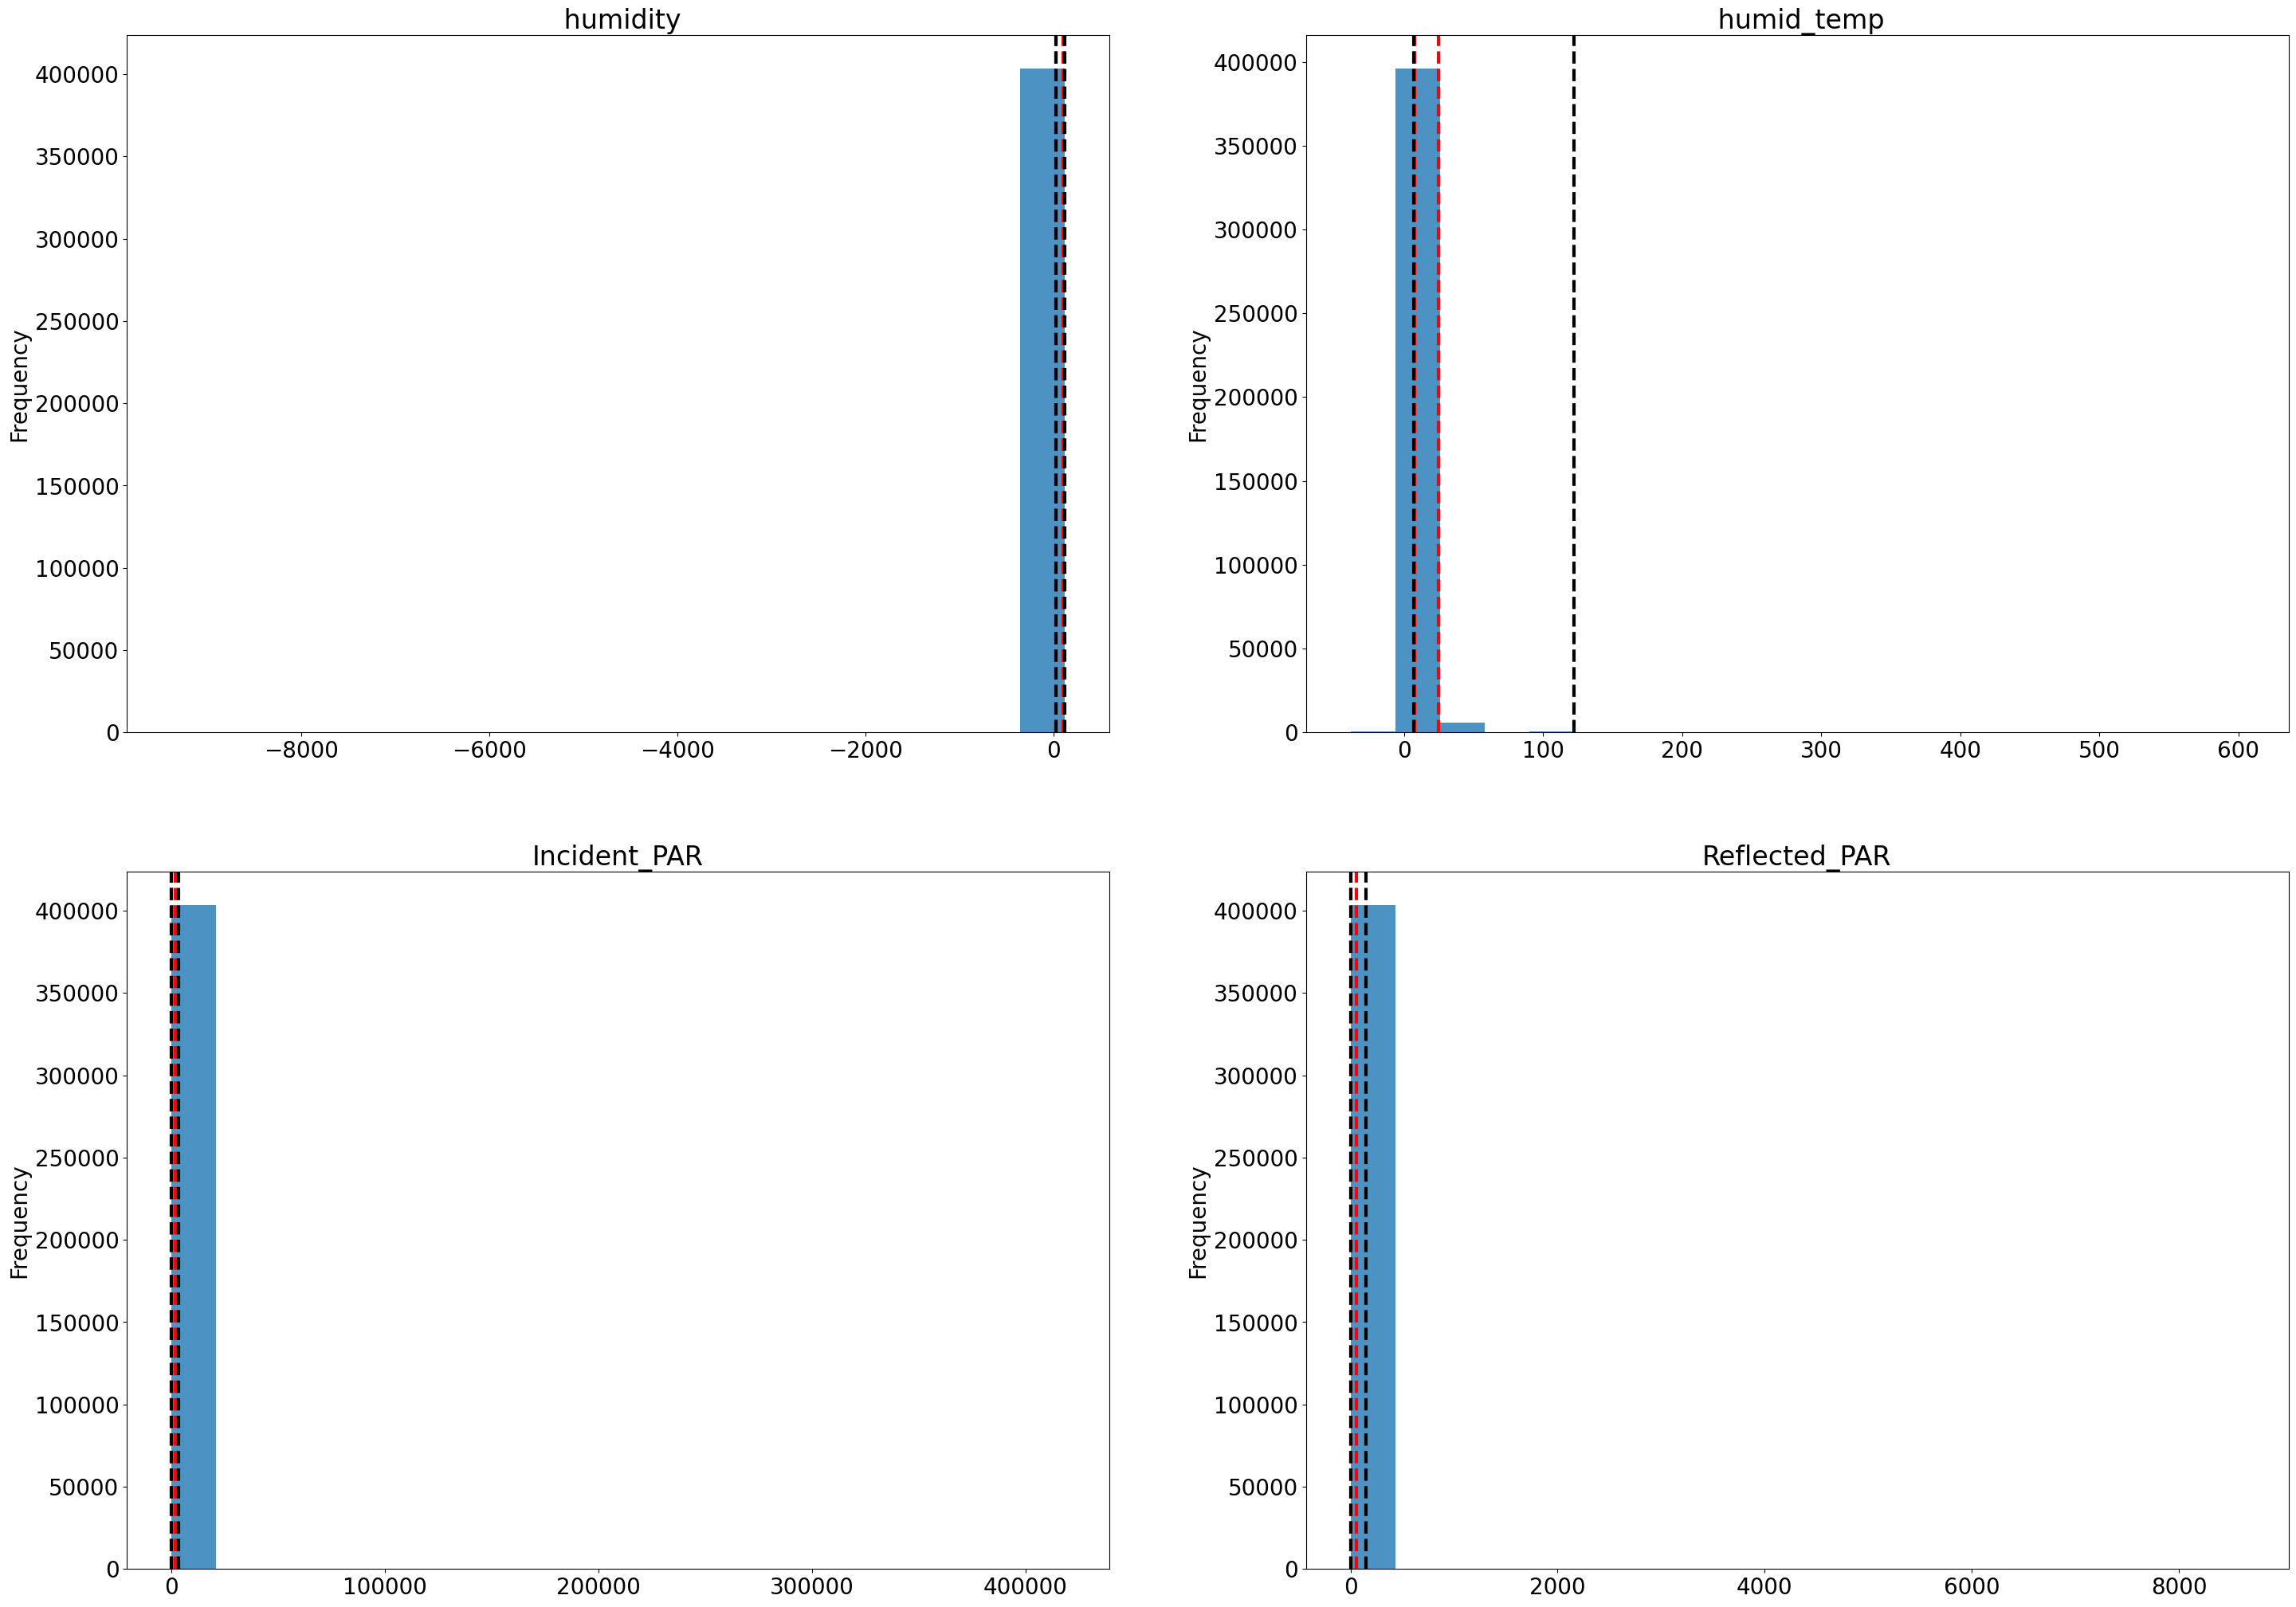

In [34]:
plt.rcParams.update({'font.size': 20})

var_list = [' humidity', ' humid_temp', 'Incident_PAR', 'Reflected_PAR']
plot_locs = [(0,0),(0,1),(1,0),(1,1)]
fig, ax = plt.subplots(2,2, figsize=(35,25))

# Choose Percentile values
percentiles = [(5,95), (25,75)]

for i,var in enumerate(var_list):
    
    sonoma_all[var].plot.hist(ax=ax[plot_locs[i][0],
                                    plot_locs[i][1]], alpha=0.8,
                              color='tab:blue',bins=20)

    ax[plot_locs[i][0],plot_locs[i][1]].set_title(var)
    
    # Get data percentiles 2.5-97.5 and 25-75
    c2_5,c97_5 = np.percentile(sonoma_all[var].values, q=2.5),np.percentile(sonoma_all[var].values, q=97.5)
    c01,c995 = np.percentile(sonoma_all[var].values, q=0.5),np.percentile(sonoma_all[var].values, q=99.99)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c2_5, color='red',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c97_5, color='red',linestyle='--',alpha=1,linewidth=3)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c01, color='k',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c995, color='k',linestyle='--',alpha=1,linewidth=3)

plt.show()

- It is clear that there are outliers for hamatop and hamabot
- Humidity has values that are negative which might not be possible as well (not sure)

In [35]:
# Hamatop/bot outliers
print('No, hamatop outliers: ', len(sonoma_all[sonoma_all['Incident_PAR']>2100]))
print('No, hamabot outliers: ', len(sonoma_all[sonoma_all['Reflected_PAR']>2000]))
# Humidity outliers
print('No. humidity outliers: ', len(sonoma_all[sonoma_all[' humidity']<5]))
print('No. Temperature outliers: ', len(sonoma_all[sonoma_all[' humid_temp']>80]))

outliers = sonoma_all[(sonoma_all['Incident_PAR']>110000) | \
                                               (sonoma_all['Reflected_PAR']>2000) | \
                                               (sonoma_all[' humidity']<5) | \
                                               (sonoma_all[' humid_temp']>80)]

print('No, combined outliers: ', len(outliers))

sonoma_all_no_outliers = sonoma_all[~((sonoma_all['Incident_PAR']>2100) | \
                                               (sonoma_all['Reflected_PAR']>2000) | \
                                               (sonoma_all[' humidity']<5) | \
                                               (sonoma_all[' humid_temp']>80))]

No, hamatop outliers:  421
No, hamabot outliers:  2
No. humidity outliers:  874
No. Temperature outliers:  746
No, combined outliers:  1407


### Replot after making changes

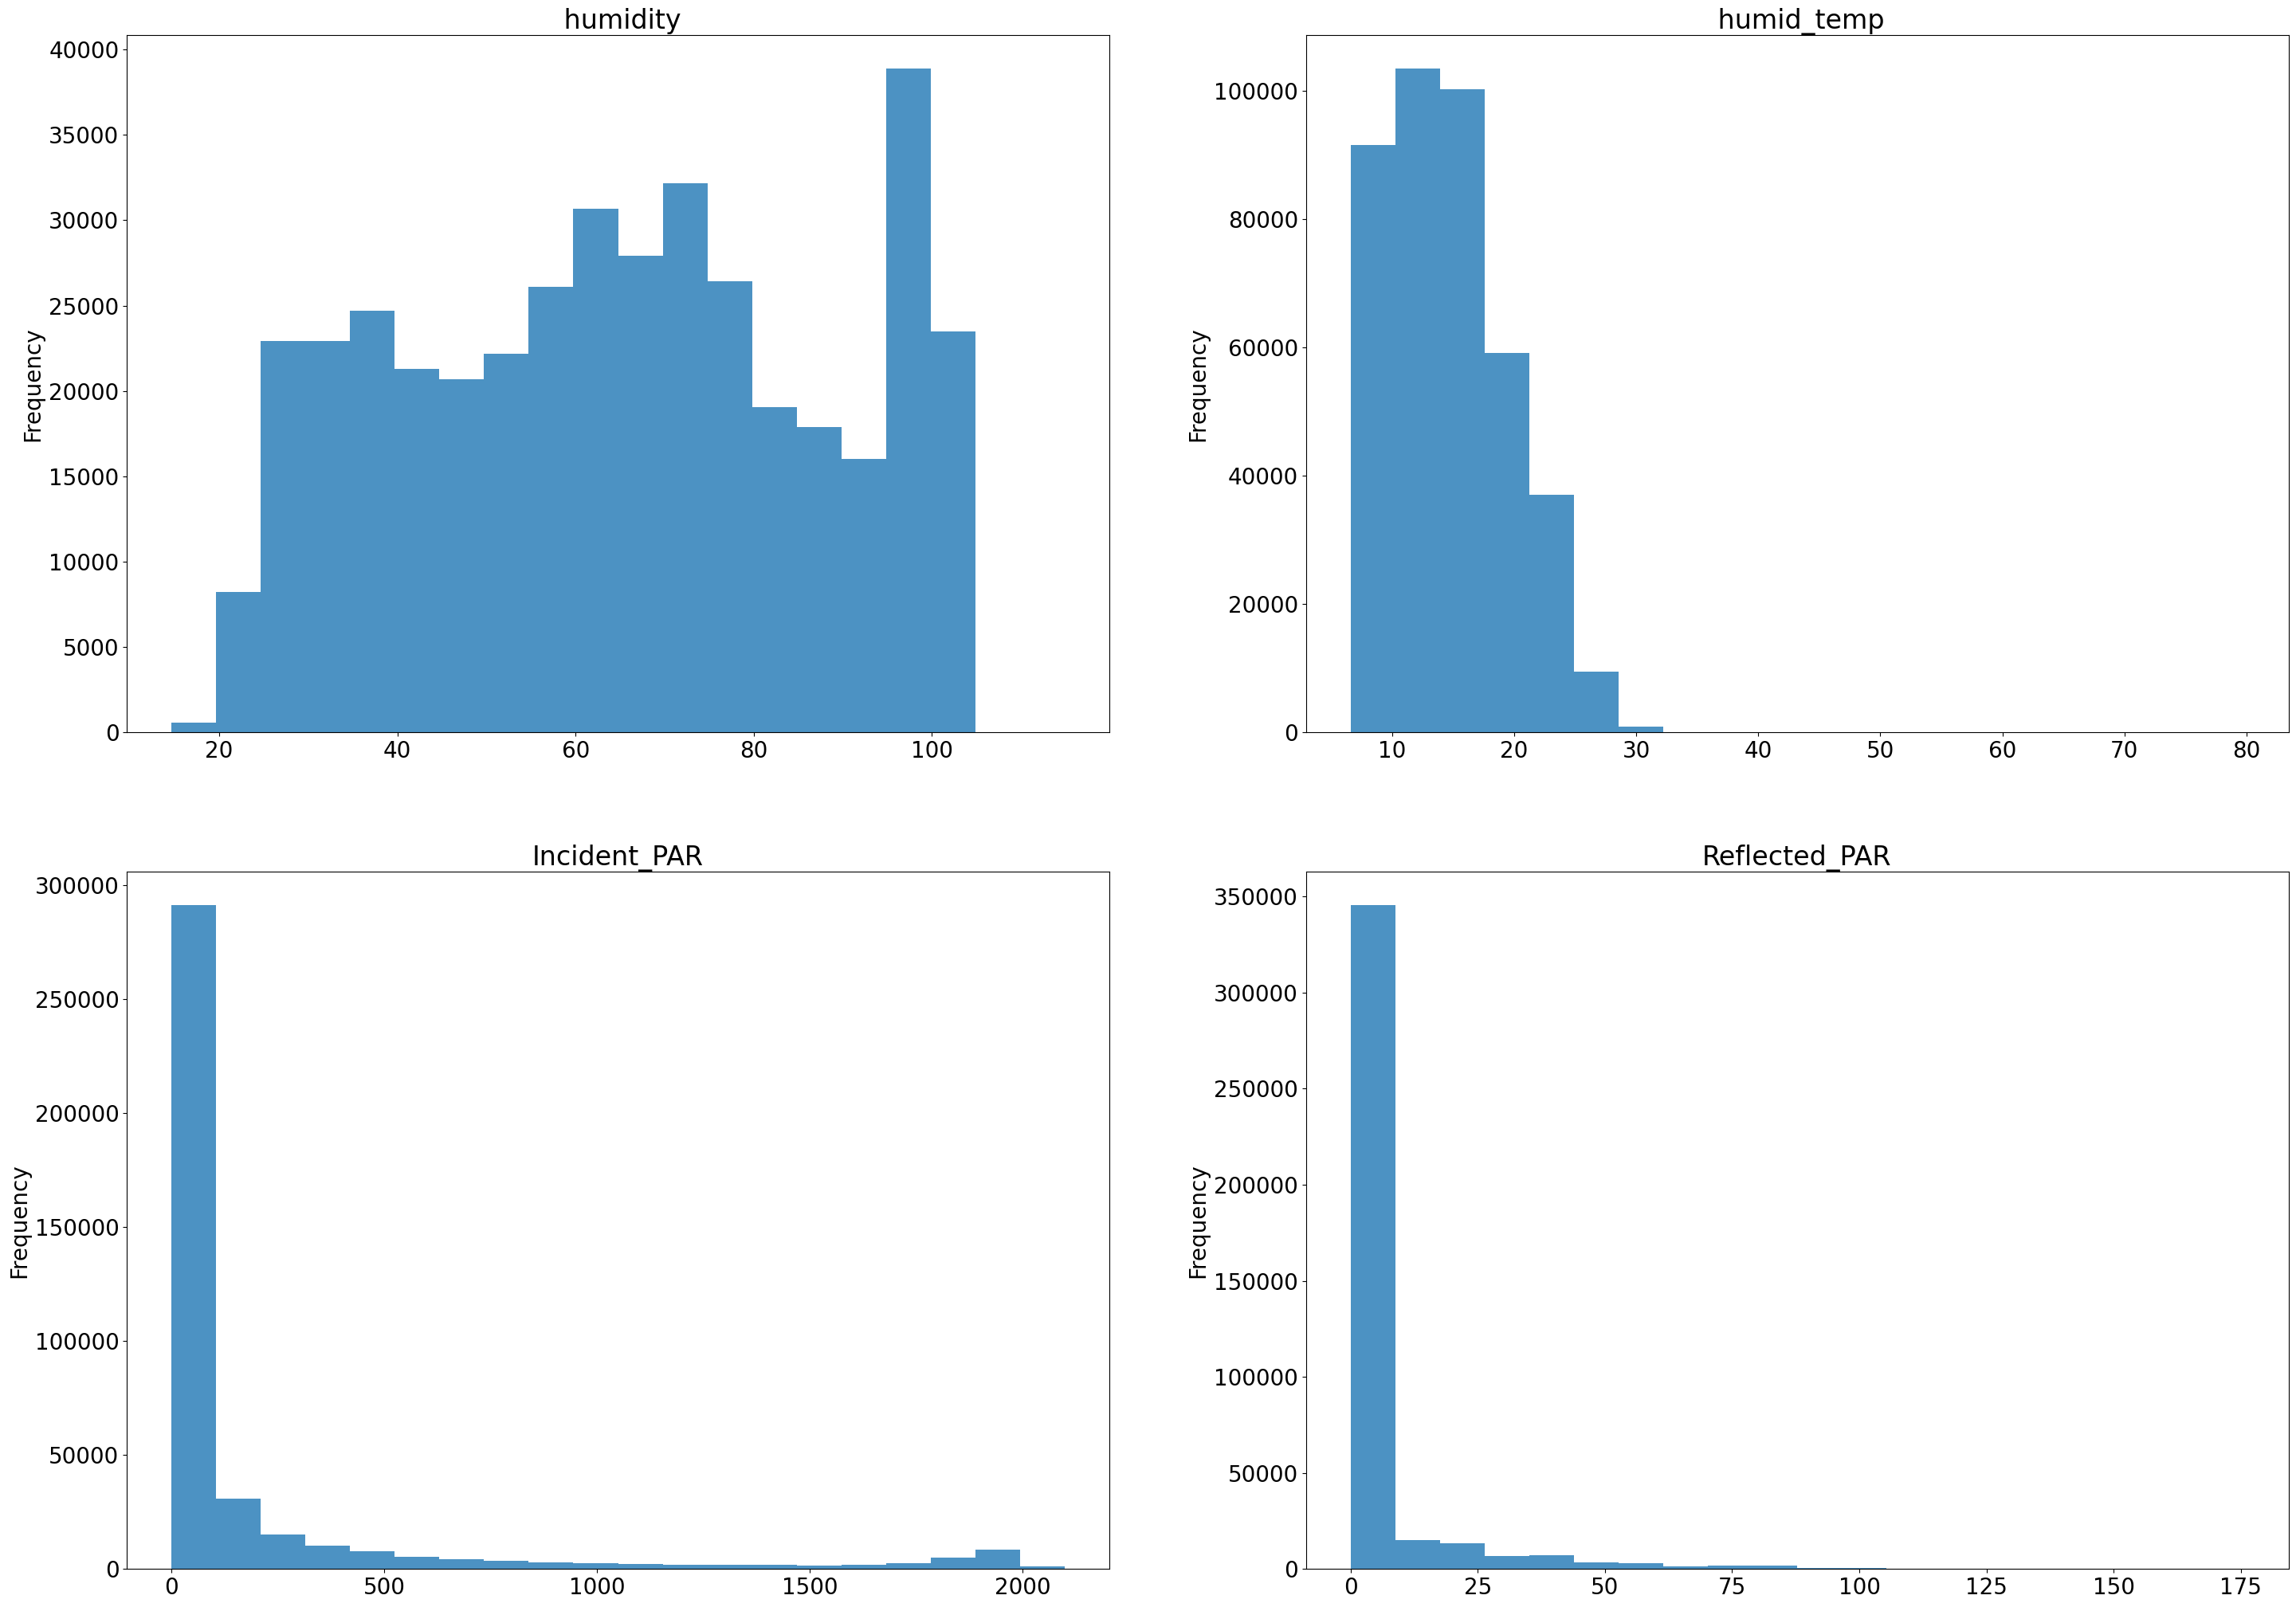

In [36]:
fig, ax = plt.subplots(2,2, figsize=(35,25))

for i,var in enumerate(var_list):
    
    sonoma_all_no_outliers[var].plot.hist(ax=ax[plot_locs[i][0],
                                    plot_locs[i][1]], alpha=0.8,
                              color='tab:blue',bins=20)

    ax[plot_locs[i][0],plot_locs[i][1]].set_title(var)
    
    # Get data percentiles 2.5-97.5 and 25-75
    c2_5,c97_5 = np.percentile(sonoma_all_no_outliers[var].values, q=2.5),np.percentile(sonoma_all_no_outliers[var].values, q=97.5)
    c01,c995 = np.percentile(sonoma_all_no_outliers[var].values, q=0.5),np.percentile(sonoma_all_no_outliers[var].values, q=99.5)
    
    #ax[plot_locs[i][0],plot_locs[i][1]].axvline(c2_5, color='red',linestyle='--',alpha=1,linewidth=3)
    #ax[plot_locs[i][0],plot_locs[i][1]].axvline(c97_5, color='red',linestyle='--',alpha=1,linewidth=3)
    
    #ax[plot_locs[i][0],plot_locs[i][1]].axvline(c01, color='k',linestyle='--',alpha=1,linewidth=3)
    #ax[plot_locs[i][0],plot_locs[i][1]].axvline(c995, color='k',linestyle='--',alpha=1,linewidth=3)

plt.show()

In [37]:
plt.rcParams.update({'font.size': 24})

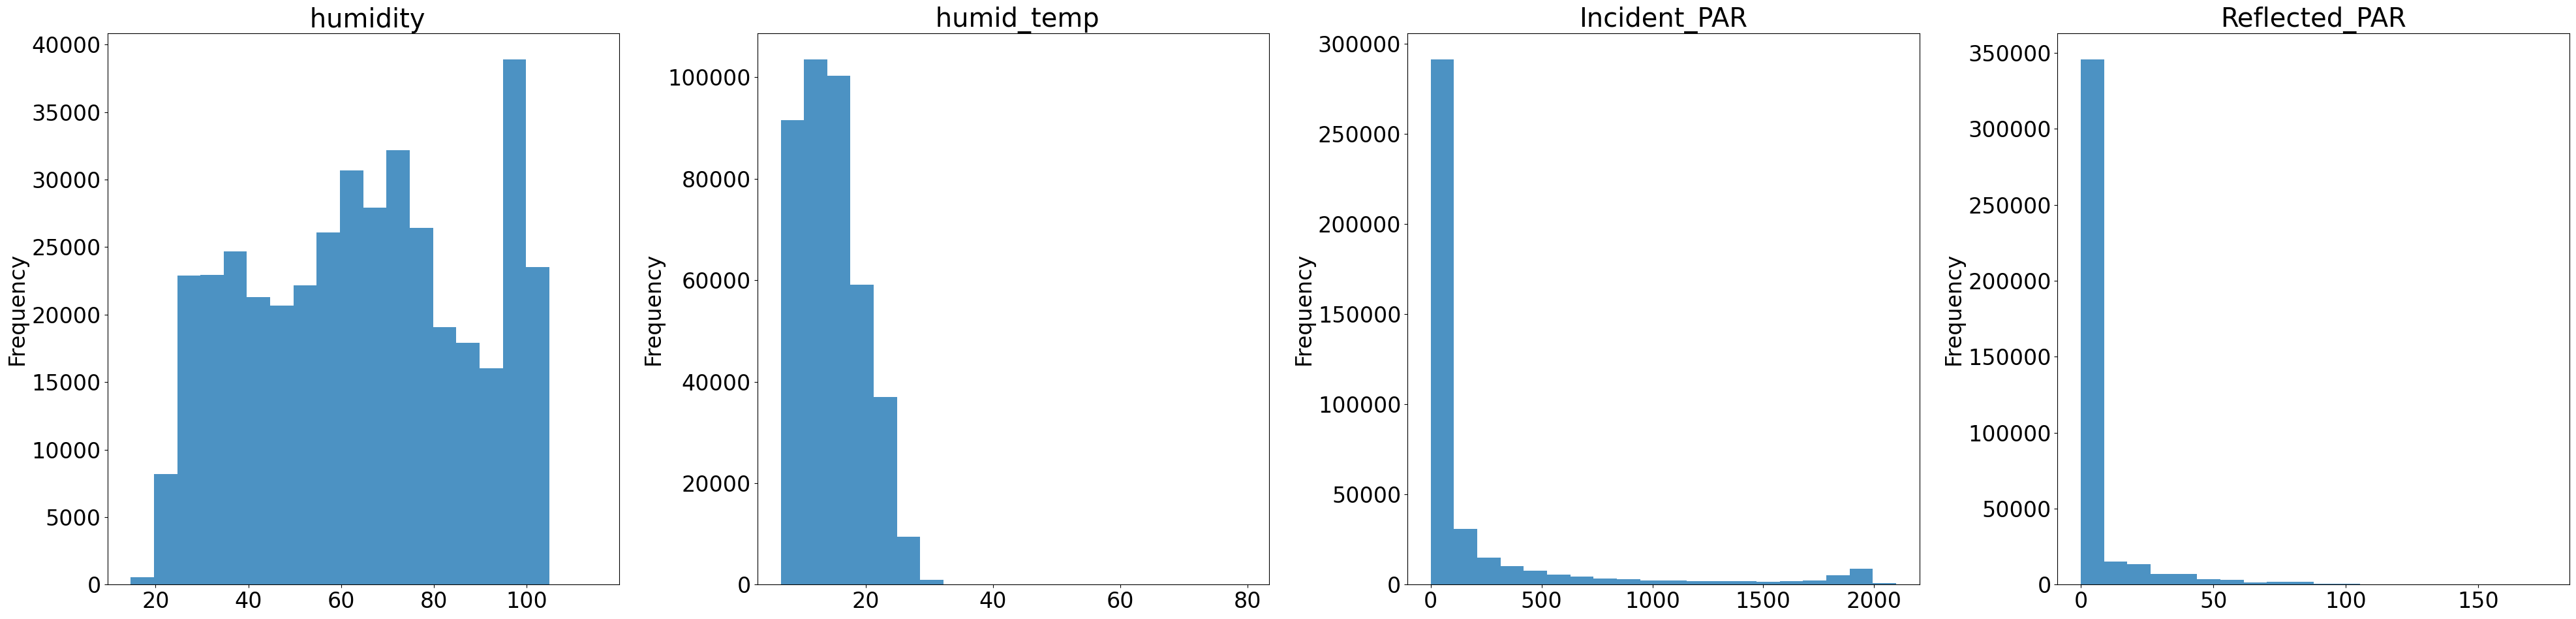

In [38]:
fig, ax = plt.subplots(1,4, figsize=(40,10))
variable_list = [' humidity', ' humid_temp', 'Incident_PAR', 'Reflected_PAR']
for i,var in enumerate(variable_list):

    sonoma_all_no_outliers[var].plot.hist(ax=ax[i], alpha=0.8, color='tab:blue',bins=20)
    ax[i].set_title(var)
plt.tight_layout()

In [39]:
sonoma_all_no_outliers.head()

result_time   epoch   nodeid   parent   voltage   depth  \
0  2004-05-07 18:24:58.666424    2812      119        5  0.645161       2   
1  2004-05-07 18:24:58.805974    2812      105      129  0.653959       3   
2  2004-05-07 18:24:59.075427    2812      113      118  0.651026       4   
3  2004-05-07 18:24:59.355354    2812      138        5  0.653959       2   
4  2004-05-07 18:24:59.675467    2812      127       42  0.651026       3   

    humidity   humid_temp   humid_adj   hamatop   hamabot  Incident_PAR  \
0    95.3567      12.6678     92.1444   4218.18       0.0     78.114444   
1    96.9957      12.6482     93.7072   9363.23       0.0    173.393148   
2    94.5031      12.4522     91.2718   9405.41       0.0    174.174259   
3    96.8828      12.6580     93.6018   9363.23       0.0    173.393148   
4    97.8044      12.3836     94.4090   4702.70       0.0     87.087037   

   Reflected_PAR     ID  Height Direc  Dist      Tree source  
0            0.0  119.0    55.2   WSW   3.0  interior    net  
1            0.0  105.0    62.9    SW   0.1  interior    net  
2            0.0  113.0    65.5    SW   0.1  interior    net  
3            0.0  138.0    57.8   WSW   0.1  interior    net  
4            0.0  127.0    60.1    SW   0.1  interior    net

In [40]:
print(len(sonoma_all_no_outliers))

402035


# 2 e) Additional Cleaning Steps
- Remove additional outliers corresponding to voltage (current can only do for log)
- Remove repeated data points which have same node id and same epoch
- There are still some extreme values for hamatop and hamabot as well as humid_temp. However they are not obviously errorneous, so we cannot tell if they are part of the distribution.

- Due to the sensitivity of the instrument, these points might be generated by miscalibration or equipment failure, and thus will not represent the data generated by the environment around the tree. This means that they will not be useful for analysis

### Removing Points with Voltage Outside Range

In [41]:
sonoma_all_no_outliers_no_voltage = sonoma_all_no_outliers[~(((sonoma_all_no_outliers[' voltage'] < 2.4) |\
                               (sonoma_all_no_outliers[' voltage'] > 3)) \
                       & (sonoma_all_no_outliers['source'] =='log'))]

In [42]:
print("No. Data Removed: ", len(sonoma_all_no_outliers) - len(sonoma_all_no_outliers_no_voltage))
print("No. Data after Removing Wrong Voltages: ", len(sonoma_all_no_outliers_no_voltage))


No. Data Removed:  28699
No. Data after Removing Wrong Voltages:  373336


### Check number of duplicates and remove

In [43]:
epoch_node_id_counts = sonoma_all_no_outliers_no_voltage.groupby([' epoch',
                                           ' nodeid']).size().reset_index().rename(columns={0:'count'}).\
                                            sort_values(by='count',ascending=False)

In [44]:
print("No Repeated Measurements: ",(epoch_node_id_counts['count']>1).sum())

No Repeated Measurements:  72720


In [45]:
sonoma_all_no_dupls = sonoma_all_no_outliers_no_voltage.groupby([' epoch', ' nodeid'], as_index=False).first()

In [48]:
print('No Data After Deduplication: ',len(sonoma_all_no_dupls))

No Data After Deduplication:  286647


# Only Take Nodes that are in Network

In [225]:
network_node_ids = sonoma_all_no_dupls[sonoma_all_no_dupls['source']=='net'][' nodeid'].unique()
sonoma_all_in_network = sonoma_all_no_dupls[sonoma_all_no_dupls[' nodeid'].isin(network_node_ids)]
print("No. Data after Removing Non Network Nodes: ", len(sonoma_all_in_network))

No. Data after Removing Non Network Nodes:  215139


# Only Take Nodes that we have location data for

In [227]:
sonoma_all_final = sonoma_all_in_network[sonoma_all_in_network[' nodeid'].isin(listed_nodes)]
print("No. Data after removining nodes with no location data: ", len(sonoma_all_final))

No. Data after removining nodes with no location data:  214859


# Final Preprocessing Steps

# Add Time Information

In [229]:
sonoma_all_final = sonoma_all_final.merge(epoch_data, left_on=' epoch', right_on='Epoch_No',how='left')

In [230]:
sonoma_all_final.to_csv('data/sonoma_data_clean_v3.csv', index=False)

# Question 3: Data Exploration

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [37]:
def clean_direc(direc):
    if pd.isna(direc):
        return np.nan

    if len(direc) == 3:
        direc = direc.strip()[-2:].upper()
    else:
        direc = direc.strip().upper()

    return direc

df = pd.read_csv('data/sonoma_data_clean.csv', parse_dates=['epoch_datetime'])
df.drop(['hamatop','hamabot'], axis=1, inplace=True)
df['direc'] = df.direc.apply(clean_direc)
df['is_interior'] = (df.tree == 'interior').astype(int)
df['hour'] = df.epoch_datetime.dt.hour

## 3 a) Pairwise Scatterplots

Aggregating data by nodeid and date

In [10]:
sub = df.groupby([df.epoch_datetime.dt.hour, df.nodeid]).aggregate({
    'height': 'mean',
    'direc': 'last',
    'dist': 'last',
    'humidity': 'mean',
    'humid_temp': 'mean',
    'incident_par': 'mean',
    'reflected_par':'mean',
}).reset_index()
sub = sub[sub.nodeid!=135]

Making Pairwise Scatterplots

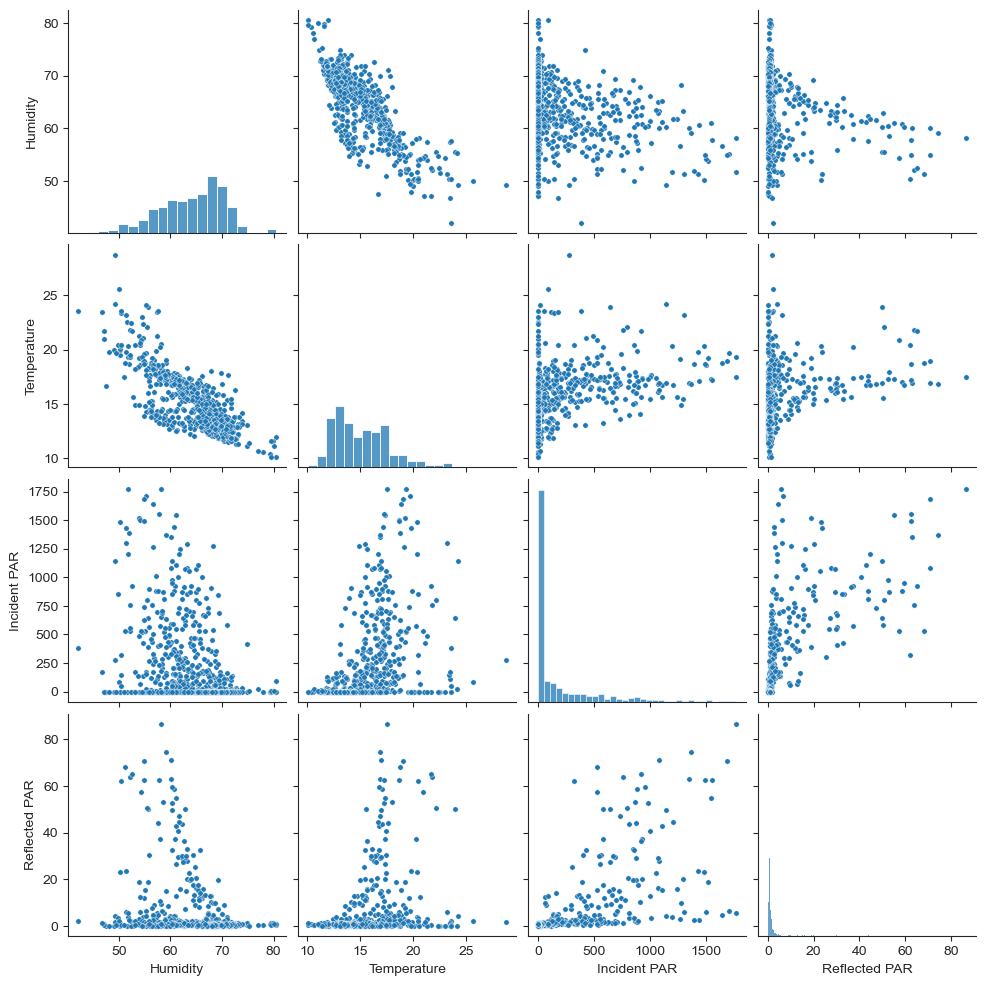

In [11]:
to_plot = (
    sub.drop(['nodeid','dist','height','epoch_datetime'], axis=1)
    .rename({'humidity': 'Humidity', 'humid_temp': 'Temperature', 'incident_par': 'Incident PAR', 'reflected_par': 'Reflected PAR'}, axis=1)
)
with sns.axes_style('ticks'):
    sns.pairplot(to_plot, height=2.5, corner=False, plot_kws={'s': 15})

# 3 b) Exploring variables related to Incident PAR

- We do this via a heat map and a GLM

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/2931321151.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


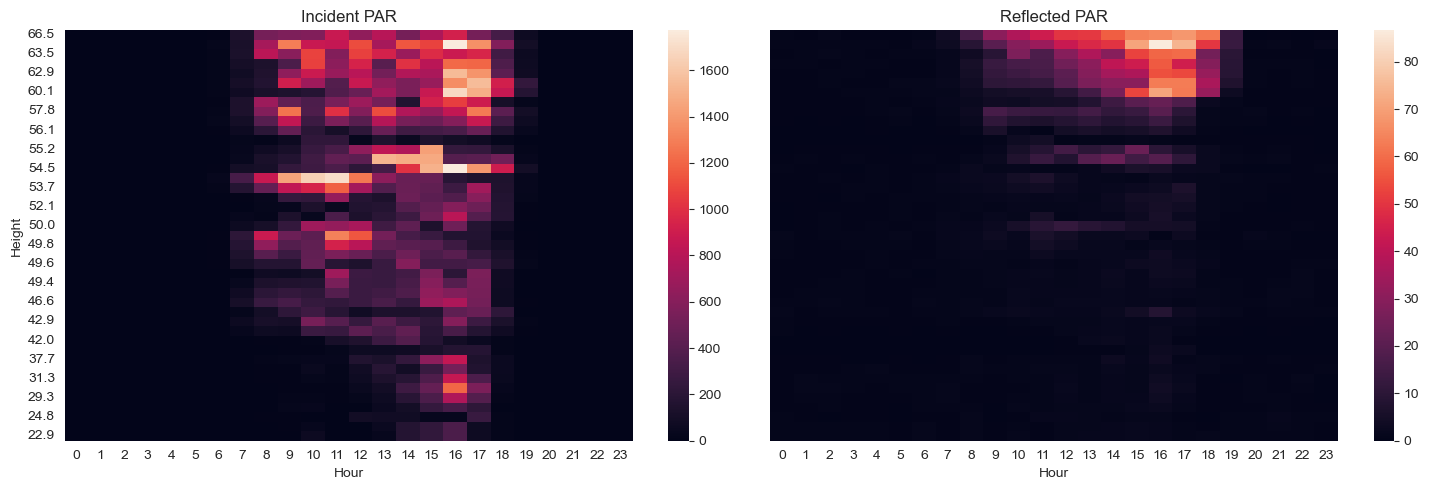

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

to_plot = (
    sub[['epoch_datetime','height','incident_par']]
    .set_index(['epoch_datetime','height'])
    .unstack().T
    .sort_index(ascending=False)
    .interpolate(method='linear')
)
to_plot.index = np.round(to_plot.index.droplevel(0), 1)
sns.heatmap(to_plot, ax=ax[0])
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Height')
ax[0].set_title('Incident PAR')

to_plot = (
    sub[['epoch_datetime','height','reflected_par']]
    .set_index(['epoch_datetime','height'])
    .unstack().T
    .sort_index(ascending=False)
    .interpolate(method='linear')
)
to_plot.index = np.round(to_plot.index.droplevel(0), 1)
sns.heatmap(to_plot, ax=ax[1])
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('')
ax[1].set_title('Reflected PAR')

fig.tight_layout()
fig.show()

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/1073342052.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


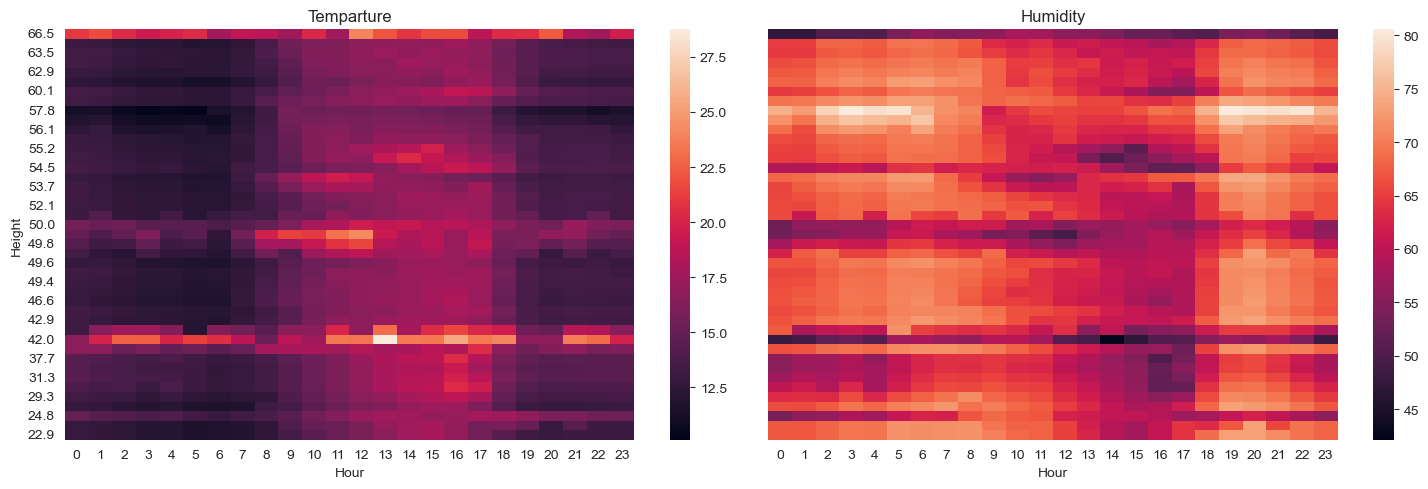

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

to_plot = (
    sub[['epoch_datetime','height','humid_temp']]
    .set_index(['epoch_datetime','height'])
    .unstack().T
    .sort_index(ascending=False)
    .interpolate(method='linear')
)
to_plot.index = np.round(to_plot.index.droplevel(0), 1)
sns.heatmap(to_plot, ax=ax[0])
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Height')
ax[0].set_title('Temparture')

to_plot = (
    sub[['epoch_datetime','height','humidity']]
    .set_index(['epoch_datetime','height'])
    .unstack().T
    .sort_index(ascending=False)
    .interpolate(method='linear')
)
to_plot.index = np.round(to_plot.index.droplevel(0), 1)
sns.heatmap(to_plot, ax=ax[1])
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('')
ax[1].set_title('Humidity')

fig.tight_layout()
fig.show()

# Question 3 c)

- Replotting several figures with enhanced color schemes

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/1247585057.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


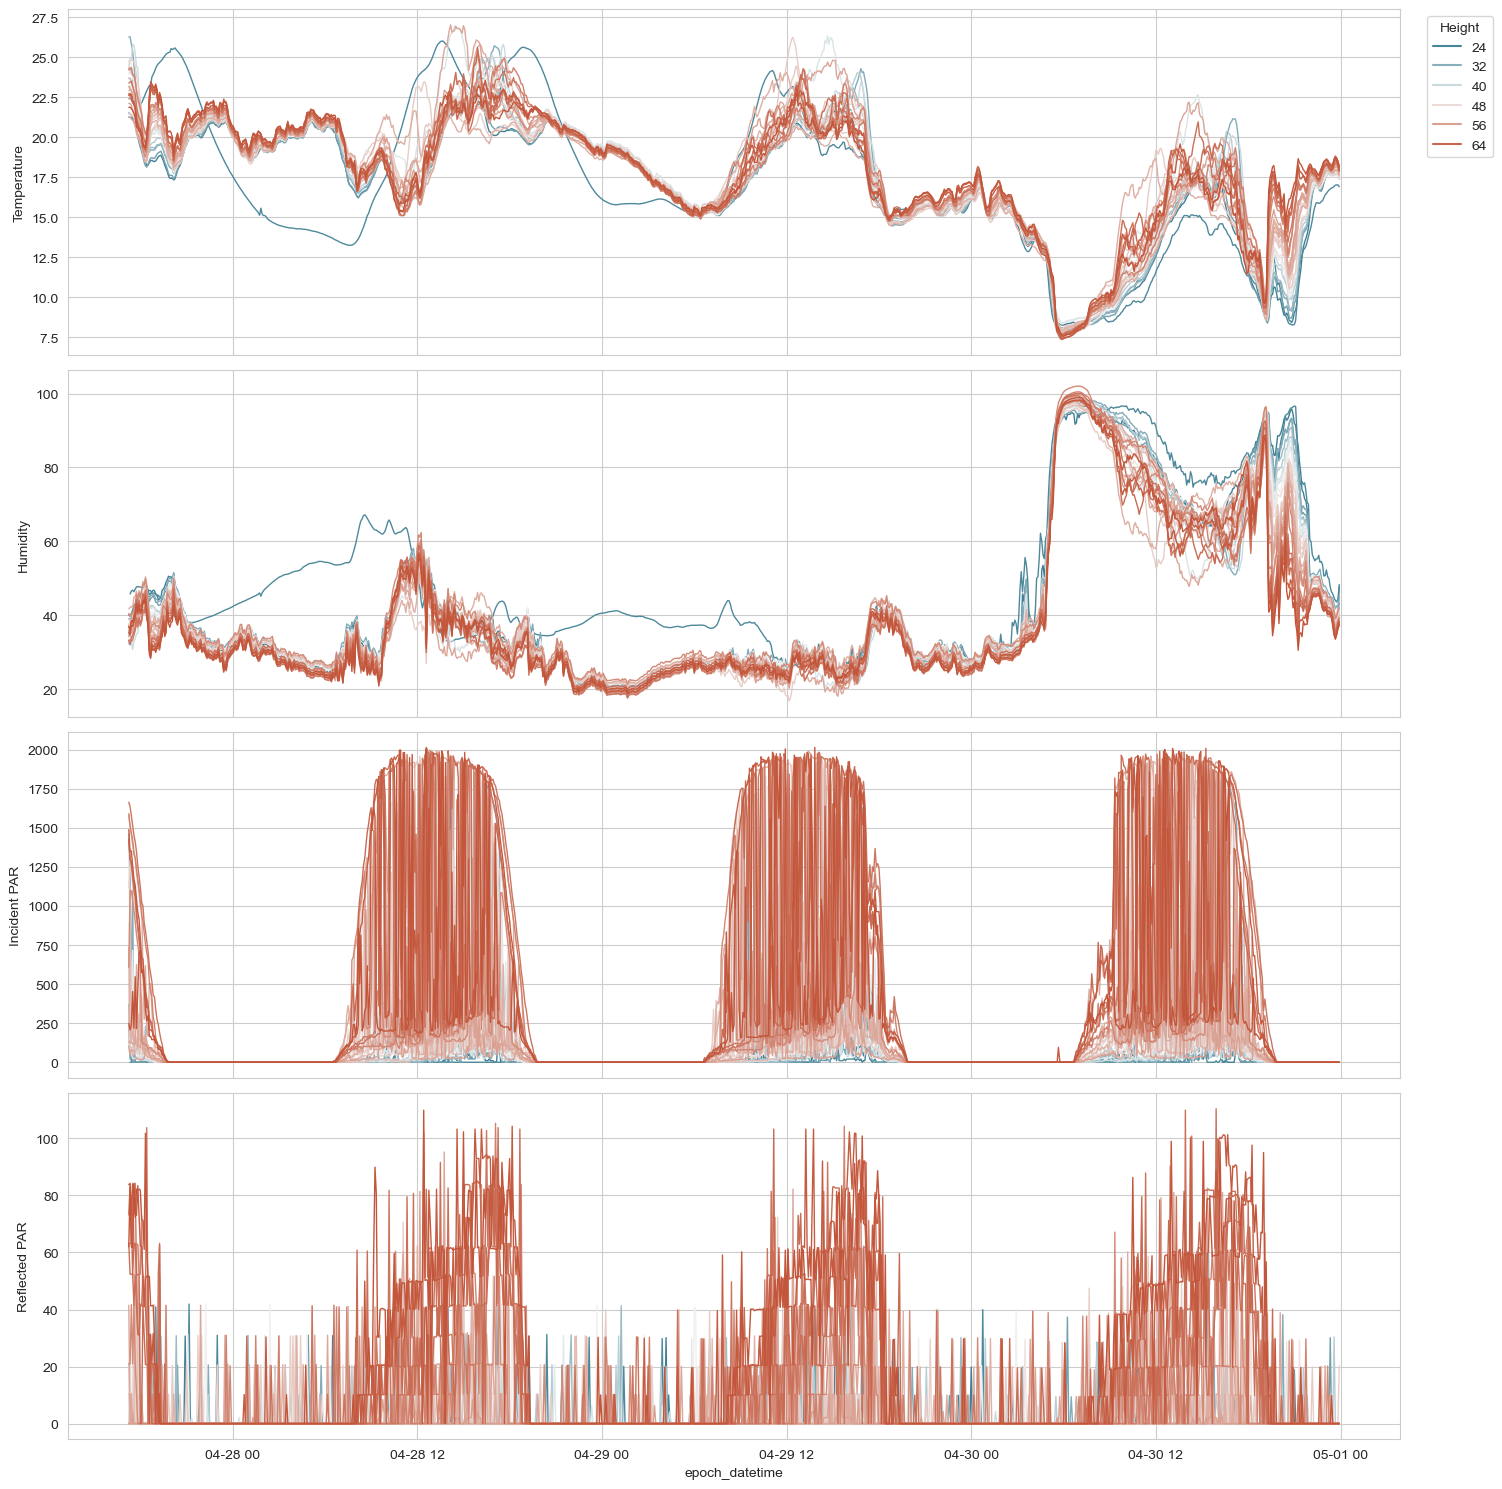

In [45]:
to_plot = df[df.epoch_datetime.between('2004-04-27','2004-05-01', inclusive="left")]
fig, ax = plt.subplots(4, 1, figsize=(15, 15), sharex=True)

sns.lineplot(data=to_plot, x='epoch_datetime', y='humid_temp', hue='height', ax=ax[0], linewidth=1, palette=sns.diverging_palette(220, 20, as_cmap=True))
sns.lineplot(data=to_plot, x='epoch_datetime', y='humidity', hue='height', ax=ax[1], linewidth=1, palette=sns.diverging_palette(220, 20, as_cmap=True))
sns.lineplot(data=to_plot, x='epoch_datetime', y='incident_par', hue='height', ax=ax[2], linewidth=1, palette=sns.diverging_palette(220, 20, as_cmap=True))
sns.lineplot(data=to_plot, x='epoch_datetime', y='reflected_par', hue='height', ax=ax[3], linewidth=1, palette=sns.diverging_palette(220, 20, as_cmap=True))

ax[0].get_legend().remove()
ax[0].set_ylabel('Temperature')
ax[0].legend(bbox_to_anchor=(1.075, 1), title='Height')
ax[1].get_legend().remove()
ax[1].set_ylabel('Humidity')
ax[2].get_legend().remove()
ax[2].set_ylabel('Incident PAR')
ax[3].get_legend().remove()
ax[3].set_ylabel('Reflected PAR')

fig.tight_layout()
fig.show()

# Question 3 d)
- PCA Analysis

In [21]:
subset = df[(df.nodeid!=135)]
X = subset[['nodeid','hour','height','dist','direc','is_interior','humidity','humid_temp','incident_par','reflected_par']]

node_meta = subset[['nodeid','height','dist','direc','is_interior']].drop_duplicates().set_index('nodeid')

X = X.groupby(['nodeid','hour']).aggregate({
    'humidity': 'mean',
    'humid_temp': 'mean',
    'incident_par': 'mean',
    'reflected_par':'mean',
})
stage = X.stack().reset_index()
stage['feature'] = stage.apply(lambda x: f"{x['level_2']}_{x['hour']}", axis=1)
stage.drop(['level_2','hour'], axis=1, inplace=True)
X = (
    stage
    .set_index(['nodeid','feature'])
    .unstack()
    .droplevel(0, axis=1)
    .join(node_meta)
)
X = pd.get_dummies(X, columns=['direc'])

In [22]:
standardlize_map = {}
ignore_cols = ['interior', 'direc']
for col in X.columns:
    ignore = False
    for icol in ignore_cols:
        if icol in col:
            ignore = True
            break
    
    if ignore: continue
    
    mu = X[col].mean()
    std = X[col].std()
    X.loc[:, col] = (X[col] - mu) / std
    standardlize_map[col] = (mu, std)

In [23]:
from sklearn.decomposition import PCA
import statsmodels.api as sm

pca = sm.multivariate.PCA(X, standardize=False, demean=False, normalize=False)

Generate Scree Plot

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/2892111880.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


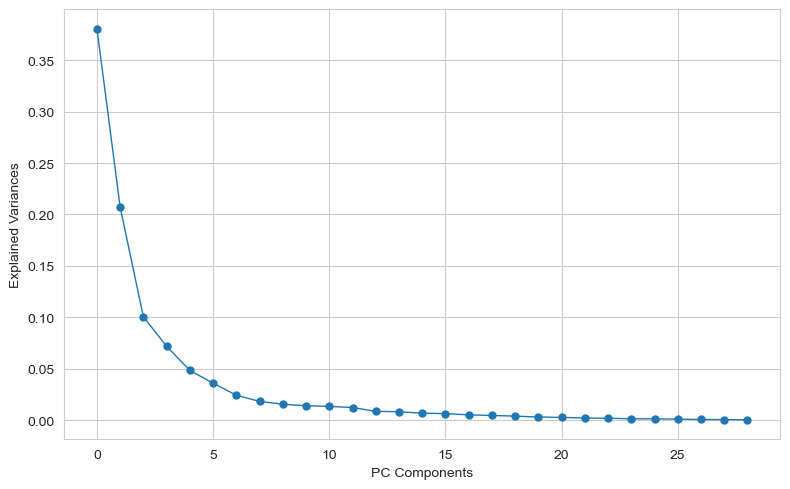

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))
(pca.eigenvals / pca.eigenvals.sum()).plot(marker='o', markersize=5, linewidth=1, ax=ax)
ax.set_xlabel('PC Components')
ax.set_ylabel('Explained Variances')
fig.tight_layout()
fig.show()

Plot Low Dimensional Representation, using first two PC Scores

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/1836723376.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


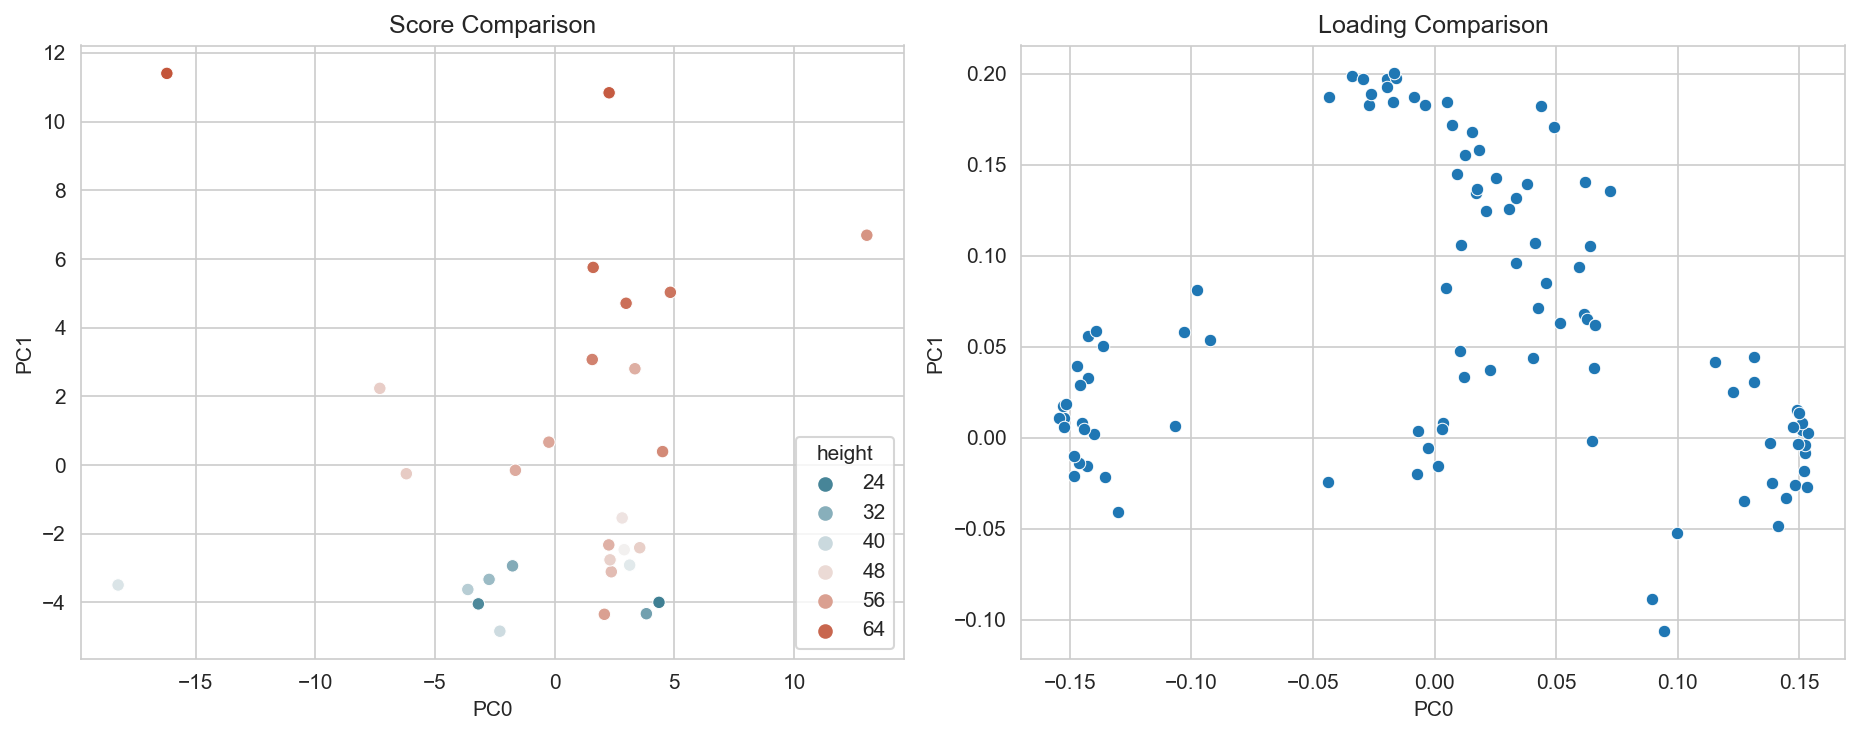

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12.5, 5), dpi=150)

sns.scatterplot(data=pca.loadings[['comp_00','comp_01']], x='comp_00', y='comp_01', ax=ax[1])
sns.scatterplot(data=pca.factors, x='comp_00', y='comp_01', hue=node_meta.height, palette=sns.diverging_palette(220, 20, as_cmap=True), ax=ax[0])

ax[0].set_xlabel('PC0')
ax[0].set_ylabel('PC1')
ax[0].set_title('Score Comparison')

ax[1].set_xlabel('PC0')
ax[1].set_ylabel('PC1')
ax[1].set_title('Loading Comparison')
fig.tight_layout()
fig.show()

# Question 4: Interesting Findings
We consider 3 findings:
- GLM Analysis
- GMM Clustering
- Time Series Auto-correlation

## 4 i) GLM Analysis

In [38]:
np.random.seed(521)

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

subset = df[(df.nodeid!=135)]
X = subset[['hour','height','dist','direc','is_interior']]
X = sm.add_constant(pd.get_dummies(X, columns=['hour', 'direc']))
y = subset['incident_par'] + 1

# model = sm.OLS(y, X)
model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.genmod.families.links.Log()))
res = model.fit()

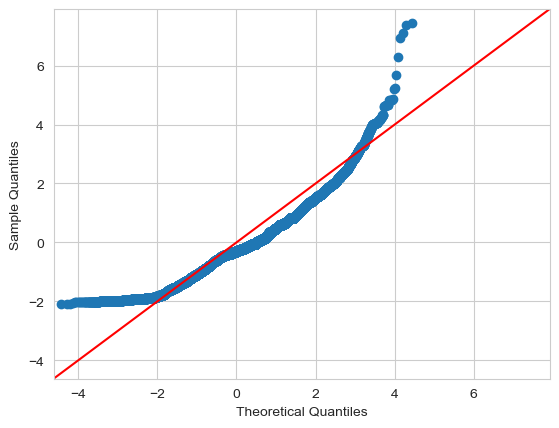

In [39]:
_ = sm.graphics.qqplot(res.resid_anscombe, line='45')

<AxesSubplot:xlabel='incident_par', ylabel='Density'>

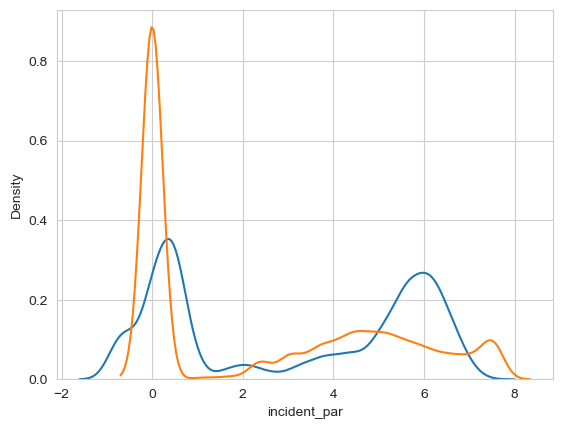

In [40]:
sns.kdeplot(X@res.params)
sns.kdeplot(np.log(y))

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/1223190161.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


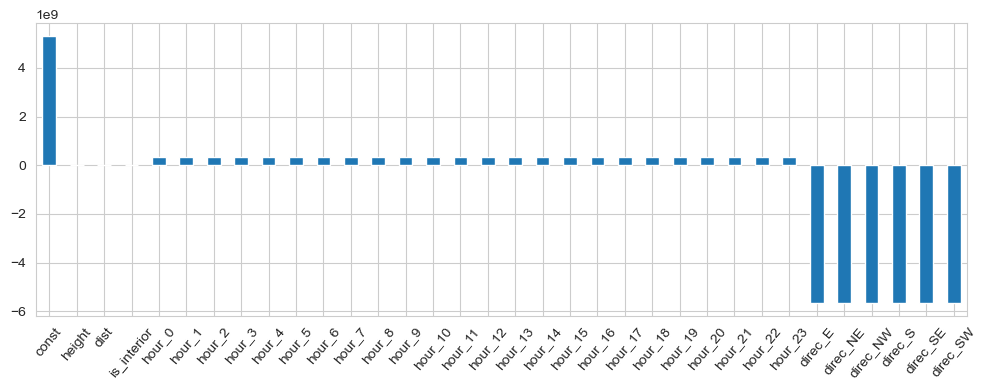

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))

res.params.plot(kind='bar', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

fig.tight_layout()
fig.show()

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/1223190161.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


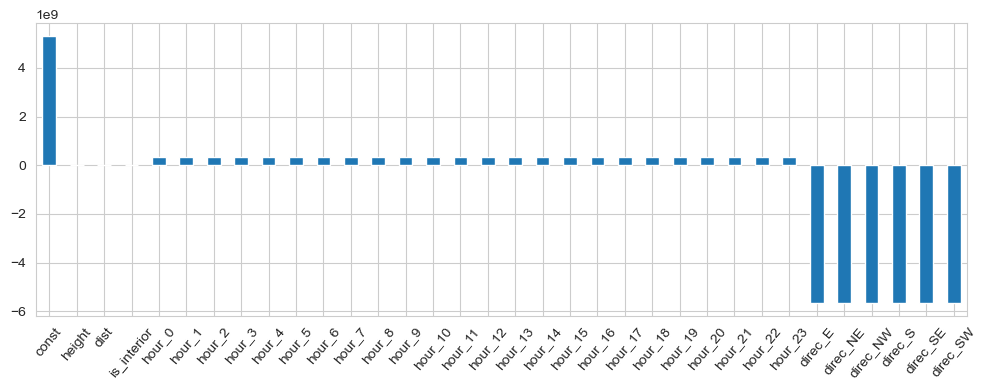

In [42]:
fig, ax = plt.subplots(figsize=(10, 4))

res.params.plot(kind='bar', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

fig.tight_layout()
fig.show()

In [43]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           incident_par   No. Observations:               228103
Model:                            GLM   Df Residuals:                   228071
Model Family:                   Gamma   Df Model:                           31
Link Function:                    Log   Scale:                          1.6300
Method:                          IRLS   Log-Likelihood:            -9.4283e+05
Date:                Thu, 13 Oct 2022   Deviance:                   2.9603e+05
Time:                        12:29:55   Pearson chi2:                 3.73e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.9355
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         5.29e+09   1.09e+10      0.487      0.626    -1.6e+10    2.66e+10
height          0.0369      0.000    133.797      0.000       0.036       0.037
dist            0.0169      0.004      4.670      0.000       0.010       0.024
is_interior    -0.1911      0.028     -6.722      0.000      -0.247      -0.135
hour_0       3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_1       3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_2       3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_3       3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_4       3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_5       3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_6       3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_7       3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_8       3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_9       3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_10      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_11      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_12      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_13      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_14      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_15      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_16      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_17      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_18      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_19      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_20      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_21      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_22      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
hour_23      3.525e+08   7.24e+08      0.487      0.626   -1.07e+09    1.77e+09
direc_E     -5.642e+09   1.16e+10     -0.487      0.626   -2.83e+10    1.71e+10
direc_NE    -5.642e+09   1.16e+10     -0.487      0.626   -2.83e+10    1.71e+10
direc_NW    -5.642e+09   1.16e+10     -0.487      0.626   -2.83e+10    1.71e+10
direc_S     -5.642e+09   1.16e+10     -0.487      0.626   -2.83e+10    1.71e+10
direc_SE    -5.642e+09   1.16e+10     -0.487      0.626   -2.83e+10    1.71e+10
direc_SW    -5.642e+09   1.16e+10     -0.487      0.626   -2.83e+10    1.71e+10
===============================================================================
"""

## Part 4 ii) GMM Clustering

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/2805119701.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


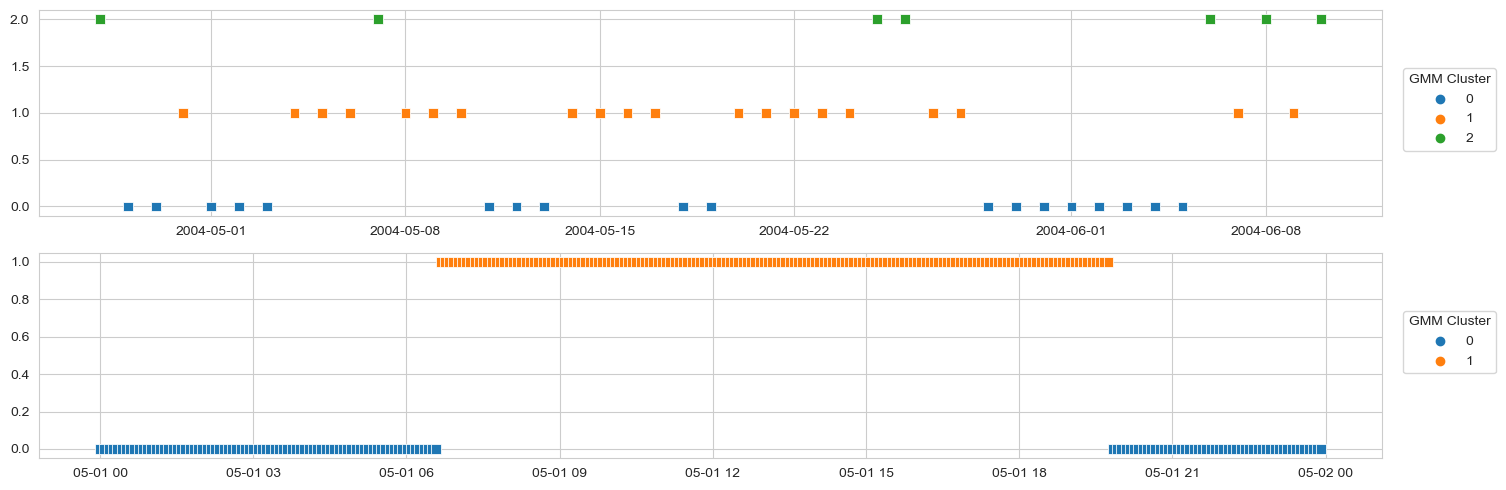

In [32]:
from sklearn.mixture import GaussianMixture

np.random.seed(352)
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

gp = df.groupby([df.epoch_datetime.dt.to_period('D')])
X = gp[['humidity','humid_temp','incident_par','reflected_par']].mean().join(
    gp[['humidity','humid_temp','incident_par','reflected_par']].std(),
    lsuffix='_mean', rsuffix='_std'
)
X = ((X - X.mean()) / X.std())

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

to_plot = pd.DataFrame({
    'day': X.index.to_timestamp(),
    'label': gmm.predict(X)
})
sns.scatterplot(data=to_plot, x='day', y='label', hue='label', s=50, marker='s', ax=ax[0], palette=sns.color_palette("tab10", n_colors=3))
ax[0].legend(title='GMM Cluster', bbox_to_anchor=(1.09, 0.75))
ax[0].set_xlabel('')
ax[0].set_ylabel('')


gp = df.groupby([df.epoch_datetime.dt.to_period('10T')])
X = gp[['humidity','humid_temp','incident_par','reflected_par']].mean().join(
    gp[['humidity','humid_temp','incident_par','reflected_par']].std(),
    lsuffix='_mean', rsuffix='_std'
).loc['2004-05-01']
X = ((X - X.mean()) / X.std())

gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)

to_plot = pd.DataFrame({
    'day': X.index.to_timestamp(),
    'label': gmm.predict(X)
})
to_plot[['cp1', 'cp2']] = gmm.predict_proba(X)

sns.scatterplot(data=to_plot, x='day', y='label', hue='label', s=50, marker='s', ax=ax[1])
ax[1].legend(title='GMM Cluster', bbox_to_anchor=(1.09, 0.75))
ax[1].set_xlabel('')
ax[1].set_ylabel('')

fig.tight_layout()
fig.show()

## Question 4 iii) Auto Correlation Analysis

In [47]:
to_plot.epoch_datetime

0       2004-04-27 17:15:00
1       2004-04-27 17:15:00
2       2004-04-27 17:15:00
3       2004-04-27 17:15:00
4       2004-04-27 17:15:00
                ...        
27379   2004-04-30 23:55:00
27380   2004-04-30 23:55:00
27381   2004-04-30 23:55:00
27382   2004-04-30 23:55:00
27383   2004-04-30 23:55:00
Name: epoch_datetime, Length: 27384, dtype: datetime64[ns]

In [56]:
from scipy.fft import fft, fftfreq

sr = to_plot.groupby(to_plot.epoch_datetime).humid_temp.median()
sr = (sr - sr.mean()) / sr.std()

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/4023131534.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


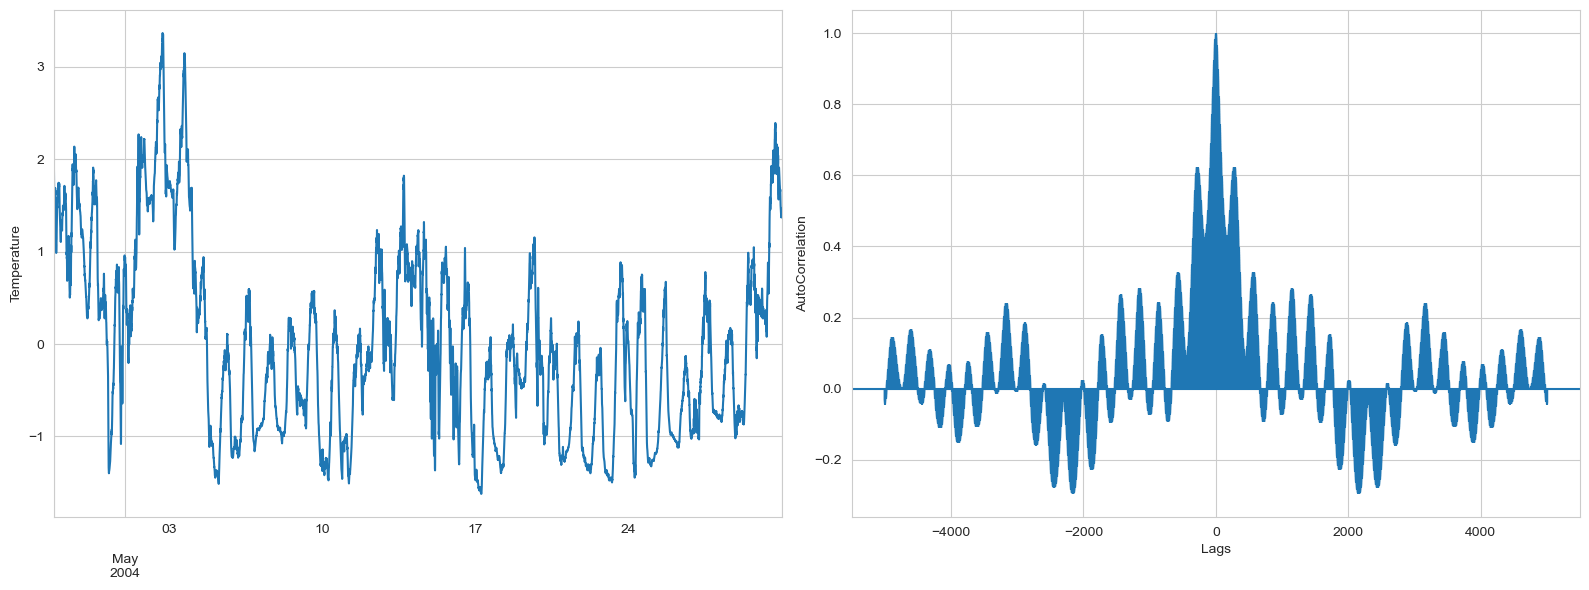

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sr.plot(ax=ax[0])
ax[1].acorr(sr, maxlags = 5000)

ax[0].set_ylabel("Temperature")
ax[0].set_xlabel("")
ax[1].set_xlabel('Lags')
ax[1].set_ylabel("AutoCorrelation")
fig.tight_layout()
fig.show()

<AxesSubplot:xlabel='epoch_datetime', ylabel='humidity'>

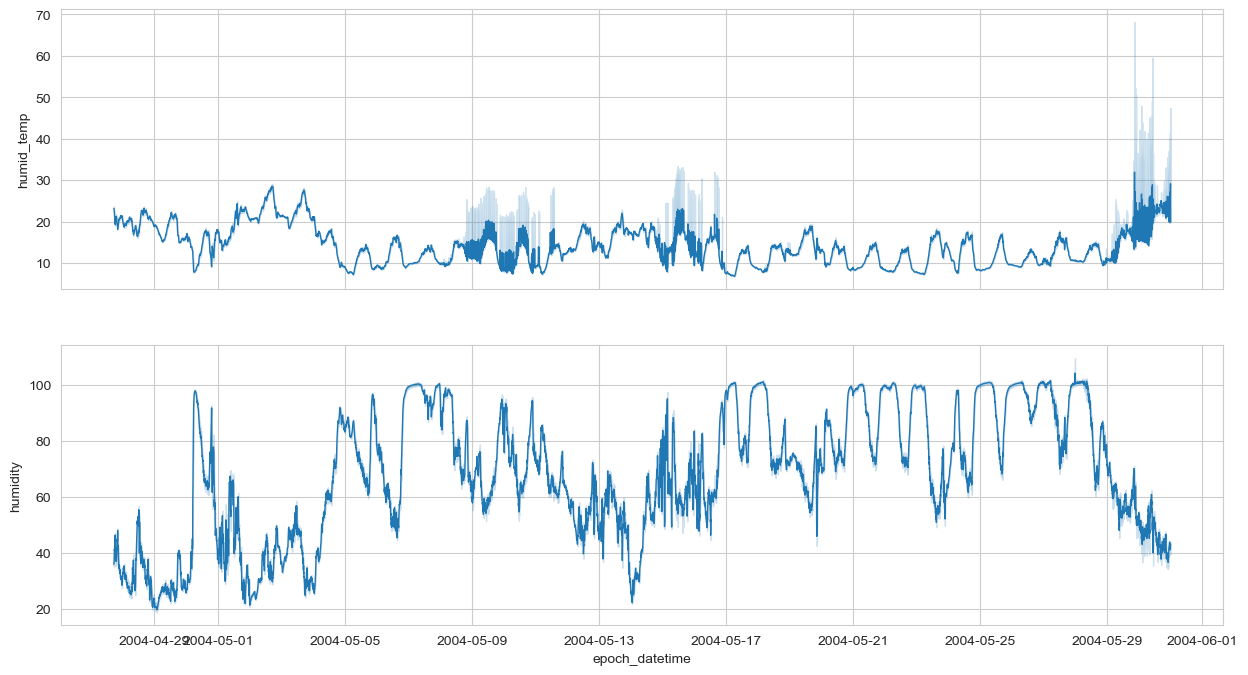

In [59]:
to_plot = df[df.epoch_datetime.between('2004-04-27','2004-05-31', inclusive="left")]
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

sns.lineplot(data=to_plot, x='epoch_datetime', y='humid_temp', ax=ax[0], linewidth=1)
sns.lineplot(data=to_plot, x='epoch_datetime', y='humidity', ax=ax[1], linewidth=1)

# Question 5: Graph Critique

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [61]:
sonoma_data_clean = pd.read_csv('data/sonoma_data_clean_v3.csv')

## Question 5 a) Plot Log transform of only non - zero and incldue spearate graph for 0 vs non zeros values

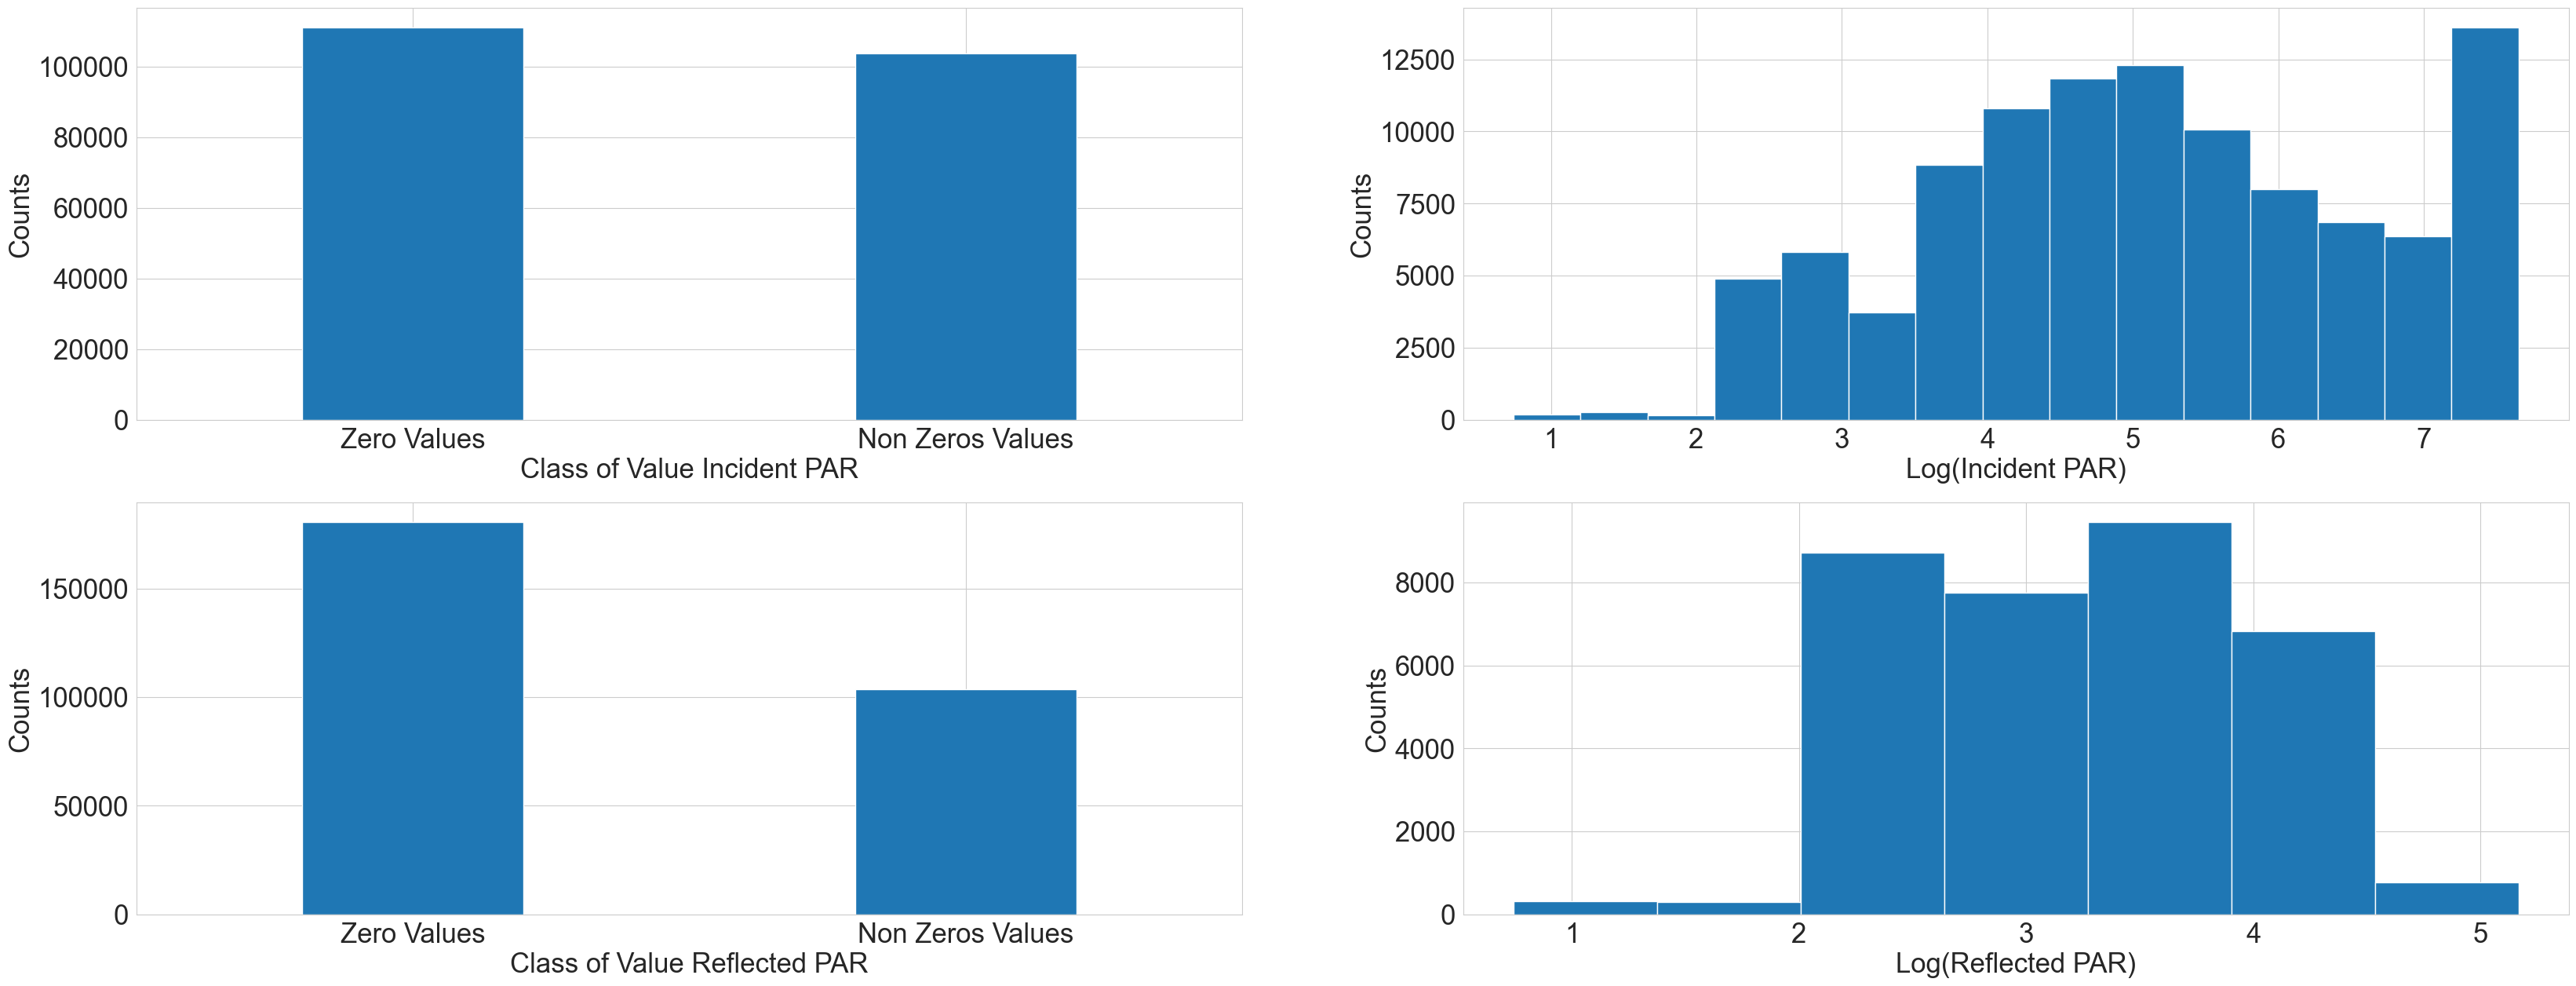

In [62]:
plt.rcParams.update({'font.size': 25})


# Incident PAR
n_zeros = np.sum(sonoma_data_clean['Incident_PAR'] == 0)
n_non_zeros = len(sonoma_data_clean) - n_zeros

fig,ax = plt.subplots(2,2, figsize=(40,15))

ax[0,0].bar(x=[0.25, 0.75],height=[n_zeros, n_non_zeros], width=0.2,tick_label=['Zero Values','Non Zeros Values'])
ax[0,0].set_xlim(0,1)

non_zero_values = sonoma_data_clean[sonoma_data_clean['Incident_PAR'] != 0]['Incident_PAR']
ax[0,1].hist(np.log(non_zero_values),bins=15)

ax[0,0].set_xlabel('Class of Value Incident PAR')
ax[0,0].set_ylabel("Counts")

ax[0,1].set_xlabel('Log(Incident PAR)')
ax[0,1].set_ylabel("Counts")

# Reflected PAR
# Incident PAR
n_zeros_ref = np.sum(sonoma_data_clean['Reflected_PAR'] == 0)
n_non_zeros_ref = len(sonoma_data_clean) - n_zeros

ax[1,0].bar(x=[0.25, 0.75],height=[n_zeros_ref, n_non_zeros_ref], width=0.2,tick_label=['Zero Values','Non Zeros Values'])
ax[1,0].set_xlim(0,1)

non_zero_values = sonoma_data_clean[sonoma_data_clean['Reflected_PAR'] != 0]['Reflected_PAR']
ax[1,1].hist(np.log(non_zero_values),bins=7)

ax[1,0].set_xlabel('Class of Value Reflected PAR')
ax[1,0].set_ylabel("Counts")

ax[1,1].set_xlabel('Log(Reflected PAR)')
ax[1,1].set_ylabel("Counts")




plt.show()

## Question 5 b) Criticism of 3c) 

- Figure 3c) Tries to visualize the distributions in the various readings across all different nodes, ordered by heights. Ideally the set of readings captured at each height should show some variation in distribution (as presented by the boxplot) for different heights.

- Figure 3c) might obscure the temporal correlations between points in a boxplot.

- For incident PAR and Relative PAR, the box plot obscures the multimodality of the data (lots of zeros) and some other dsitribution

- The plot is also cluttered with too many heights

Try to improve by sub sampling nodes but plotting the full distribution (histogram) at larget height increments

In [ ]:

plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots(figsize=(15,5))
sonoma_data_clean['Height'].value_counts().sort_index().plot.bar(rot=90, ax=ax)

In [ ]:
selected_heights = [29.3,31.3, 37.7,42.9, 46.6,49.4, 54.0,60.1, 65.5]

In [ ]:
fig, ax = plt.subplots(len(selected_heights),1, figsize=(10,8))
for i,h in enumerate(selected_heights[::-1]):
    
    selected_data = sonoma_data_clean[sonoma_data_clean['Height']==h]
    
    #ax[i].hist(np.log(0.1+selected_data['Incident_PAR'].values),bins=15)
    sns.kdeplot(np.log(0.1+selected_data['Incident_PAR'].values),ax=ax[i])

    # Hide the right and top spines
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
    ax[i].spines.left.set_visible(False)
   # ax[i].set(ylabel=f'{h}',rotation=43)
    ax[i].set_ylabel(f'Height: {h}', rotation=0)
    ax[i].set_yticks([])
    ax[i].set_xlim(-5,10)
    if i < len(selected_heights)-1:
        ax[i].set_xticks([])
    #ax[i].set_xticks([])

## Question 5 c)

- We mainly focus on improving color
- Can try colouring by height
- Start from Sat May 1 09:35:00 2004 − timestep 1062 and take 1 day

Loading in height data

In [64]:
# Loads the information
mote_location = pd.read_csv('Data/mote-location-data.txt',sep='\t',skiprows=1,header=None)

# Loads the headers
mote_location_head = pd.read_csv('Data/mote-location-data.txt',sep='\t',header=0).columns

# Clean the headers
col_names_mote_location = [x for x in mote_location_head[0].split(' ') if x!='']

# Set the column names
mote_location.columns = col_names_mote_location

In [65]:
nodeid_height_map = dict(zip(mote_location['ID'],mote_location['Height']))

Subsetting Data to the time period required

In [66]:
time_data = sonoma_data_clean[(sonoma_data_clean['Epoch_datetime']<='2004-05-02') & \
                  (sonoma_data_clean['Epoch_datetime']>='2004-05-01')]

print(len(time_data[' nodeid'].unique()))
print(len(time_data[' nodeid'].unique()))

25
25


In [67]:
from matplotlib import colormaps
import matplotlib as mpl

In [68]:
node_id_list = time_data[['Epoch_datetime',' nodeid',' humidity']].groupby(['Epoch_datetime', ' nodeid'])\
    .mean()\
    .unstack().columns
node_id_list = [x[1] for x in node_id_list]
heights = np.array([nodeid_height_map[x] for x in node_id_list])
heights = np.nan_to_num(heights)
# normalize
heights = (heights-np.mean(heights))/np.std(heights) 
height_colors = [colormaps['coolwarm'](x) for x in heights]

### Humidity Plot with Colors for Height

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/1437084370.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


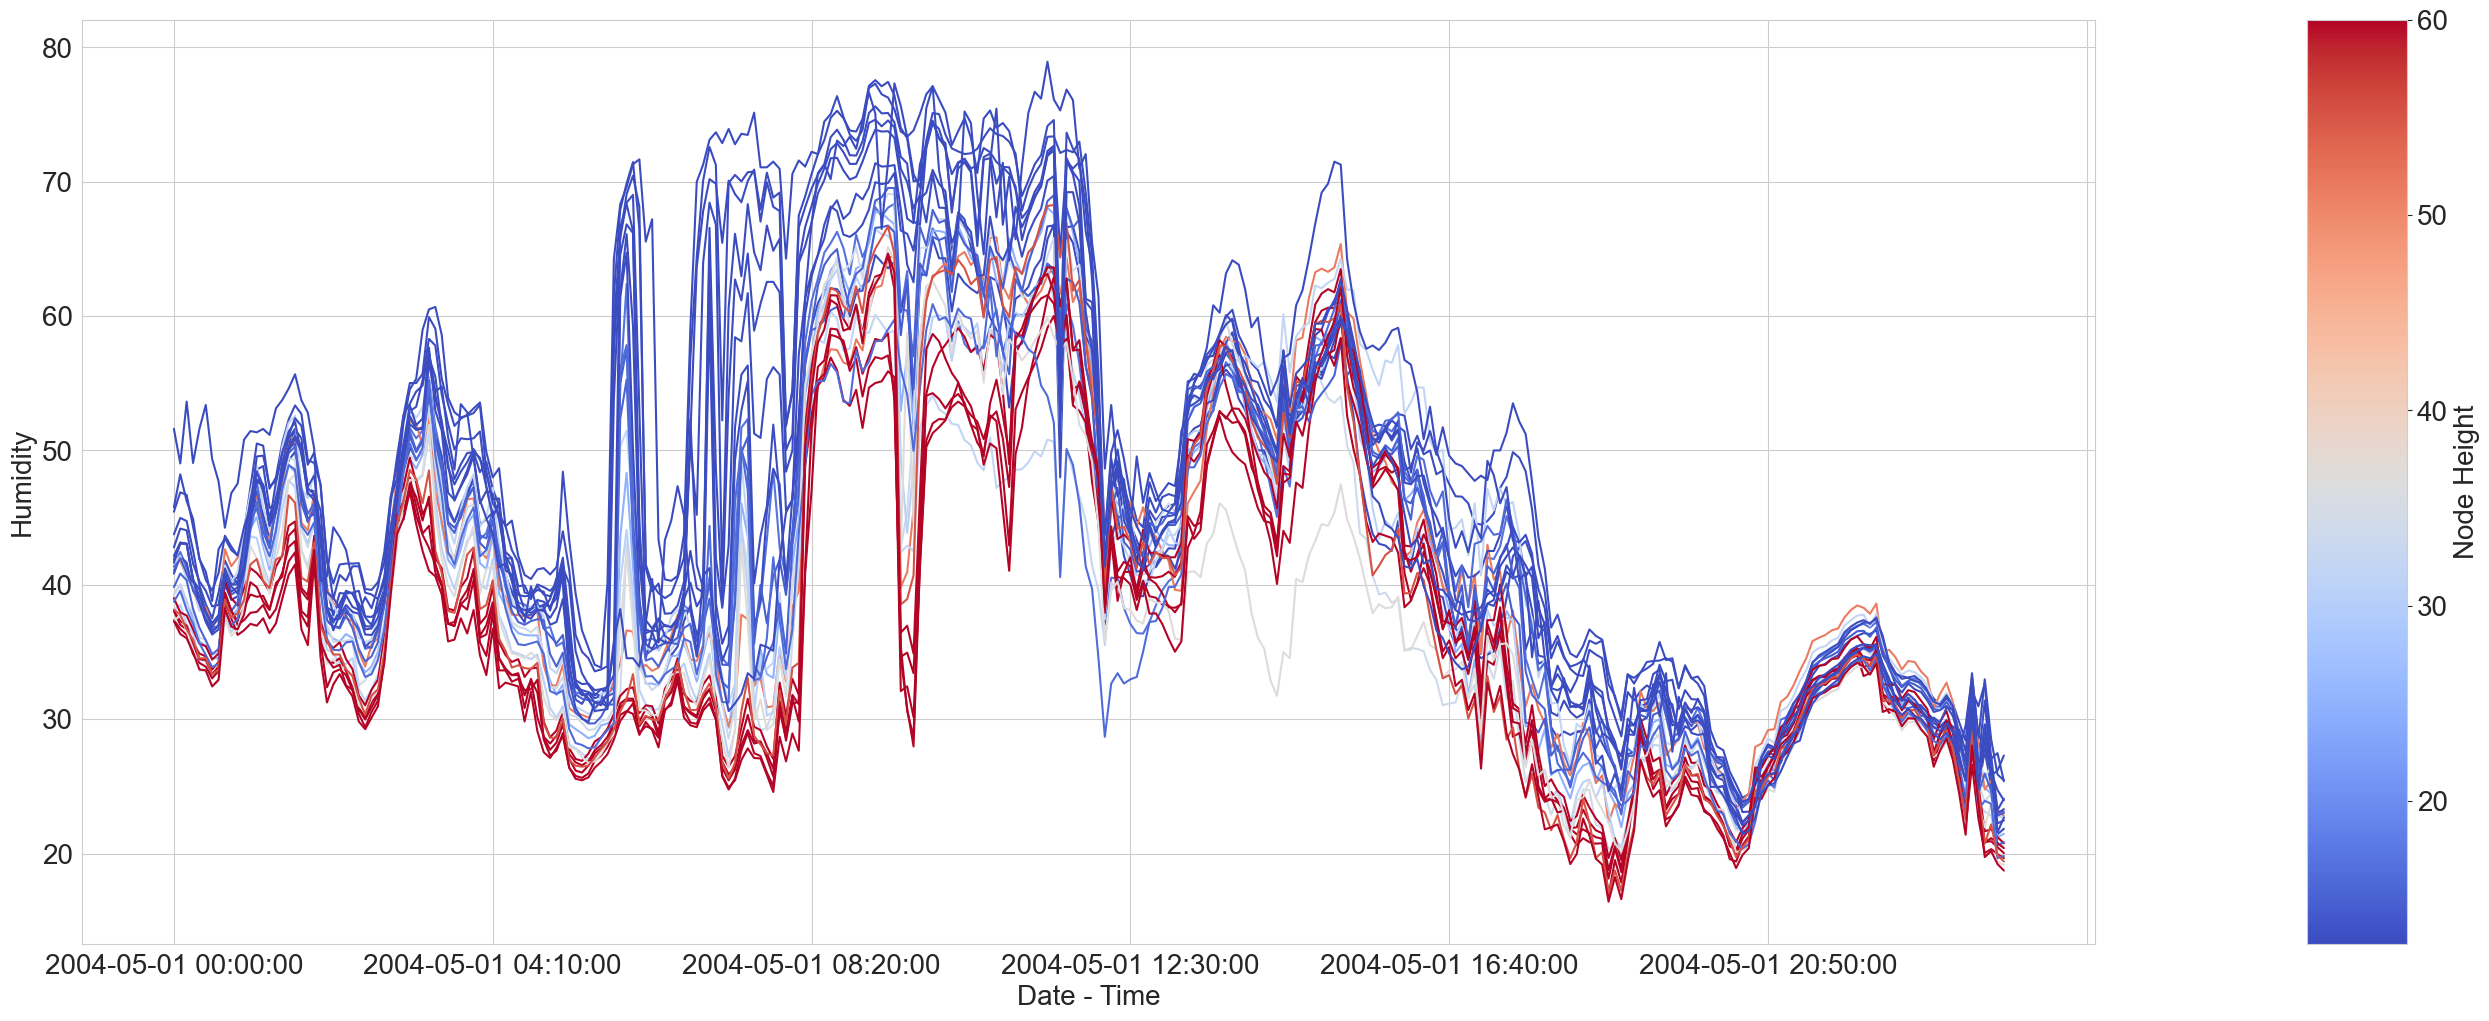

In [69]:
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(1,2,figsize=(30,12),gridspec_kw={'width_ratios': [20, 1]})

graph = time_data[['Epoch_datetime',' nodeid',' humidity']].groupby(['Epoch_datetime', ' nodeid'])\
    .mean()\
    .unstack().plot(ax = ax[0], legend=False,color = height_colors)

ax[0].set_xlabel('Date - Time')
ax[0].set_ylabel('Humidity')


cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=12.7, vmax=60)

cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Node Height')

fig.show()


## Temperature Plot with Colors for Height

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/103250880.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


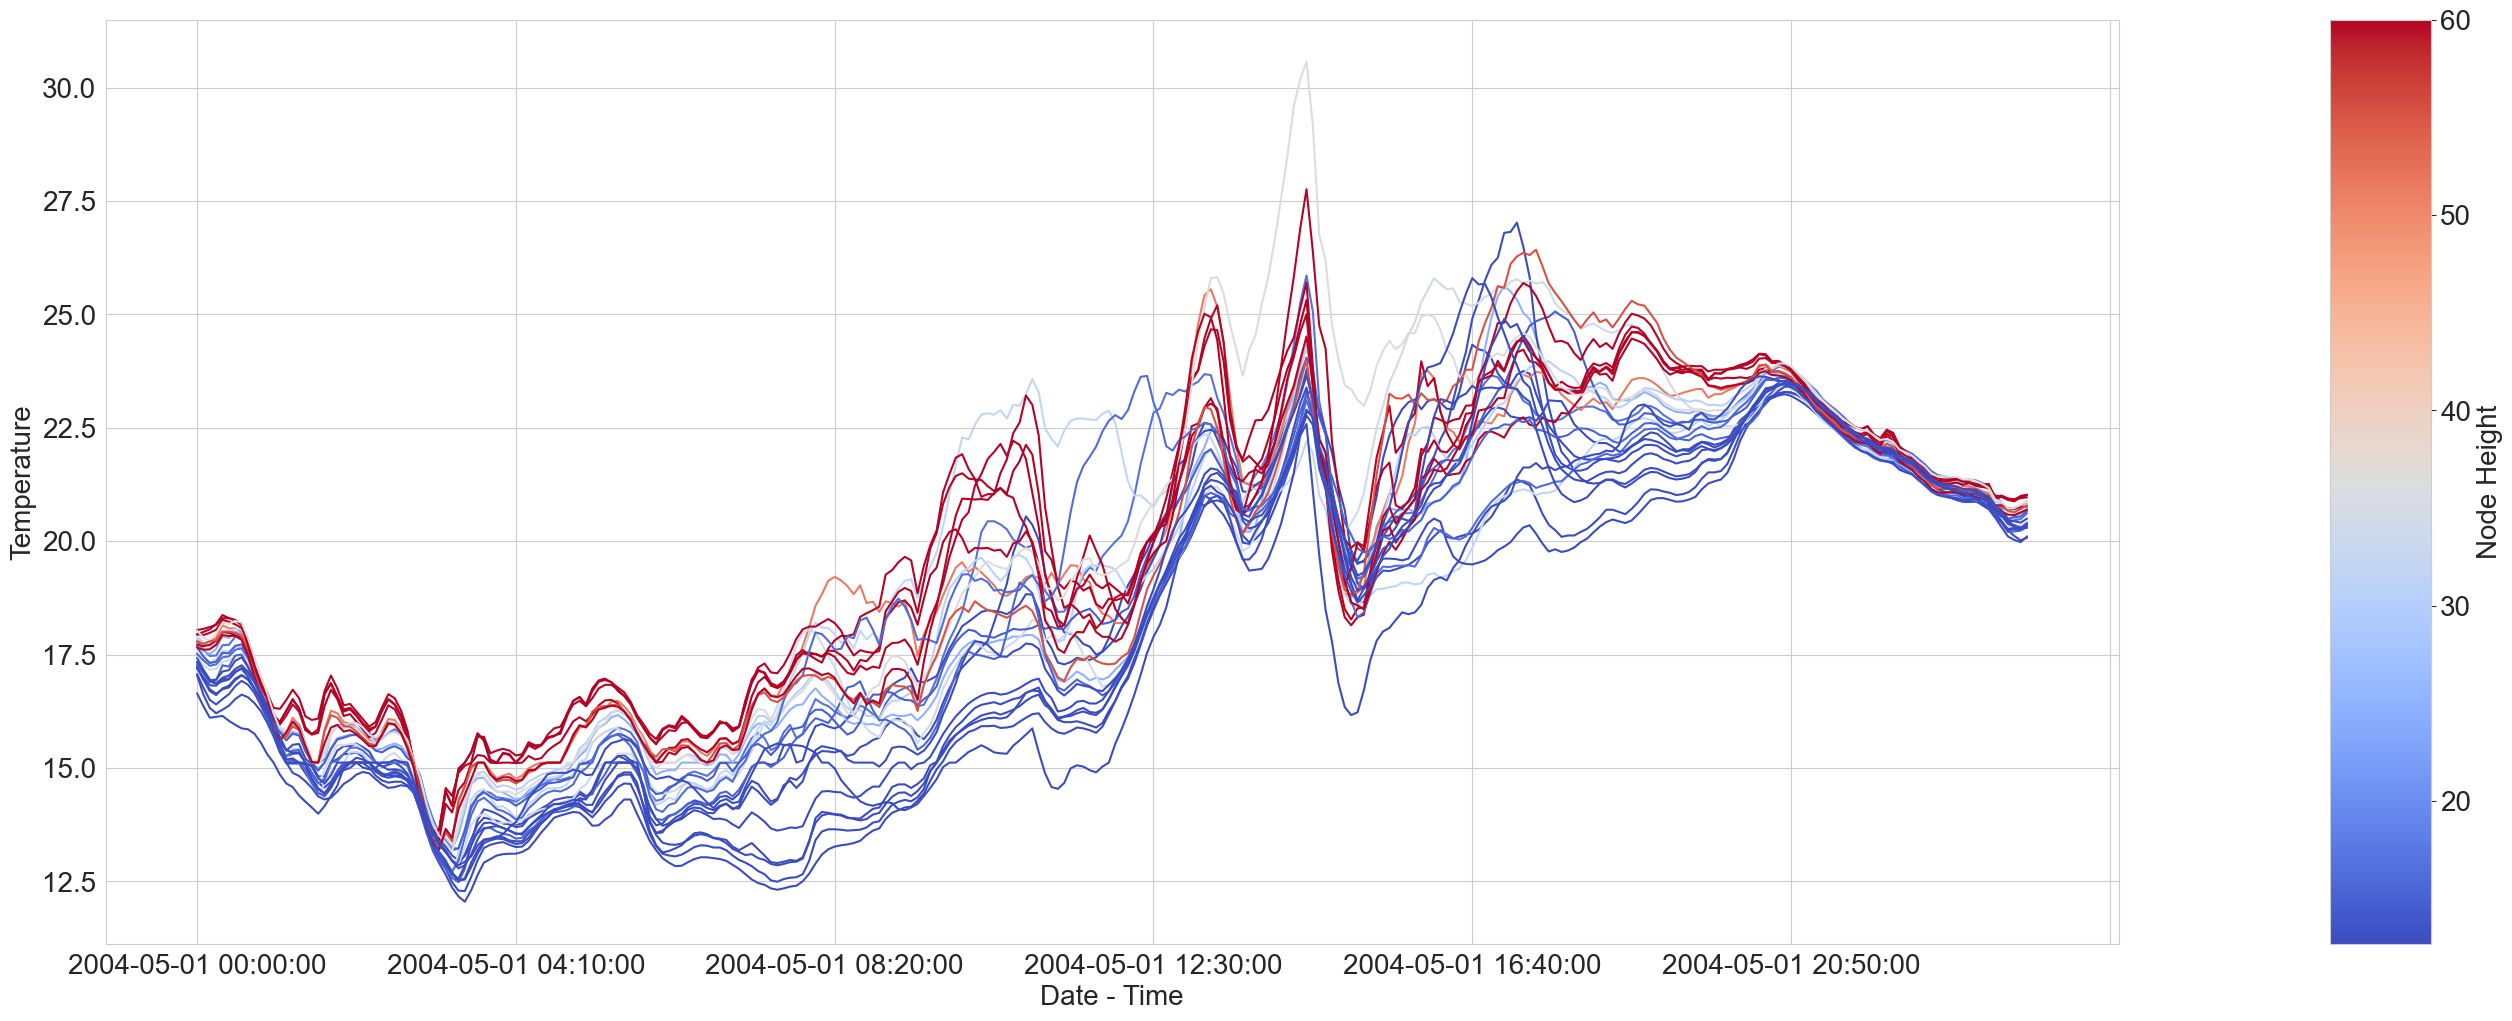

In [70]:
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(1,2,figsize=(30,12),gridspec_kw={'width_ratios': [20, 1]})

graph = time_data[['Epoch_datetime',' nodeid',' humid_temp']].groupby(['Epoch_datetime', ' nodeid'])\
    .mean()\
    .unstack().plot(ax = ax[0], legend=False,color = height_colors)

ax[0].set_xlabel('Date - Time')
ax[0].set_ylabel('Temperature')


cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=12.7, vmax=60)

cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Node Height')

fig.show()

## Question 5 d) Reworking Plots for Diferences in Yield
- The main change we make is plotting onto the same axis

In [72]:
final_ep = 12635

In [73]:
epoch_data = pd.read_csv('data/epoch_data_processed.csv')
min_ep = epoch_data['Epoch_No'].min()
max_ep = final_ep
no_eps = max_ep-min_ep+1

sonoma_log = pd.read_csv('Data/sonoma-data-log.csv')
sonoma_net = pd.read_csv('Data/sonoma-data-net.csv')

sonoma_log = sonoma_log.groupby([' epoch', ' nodeid'], as_index=False).first()
sonoma_net = sonoma_net.groupby([' epoch', ' nodeid'], as_index=False).first()

#nodeid_list = list(set(list(sonoma_log[' nodeid'].unique()) + list(sonoma_net[' nodeid'].unique())))
nodeid_list = list(sonoma_net[' nodeid'].unique())

yield_frame_net = []
yield_frame_log = []
for epo in range(min_ep, max_ep+1):
    df = pd.DataFrame([nodeid_list,len(nodeid_list)*[epo]]).T
    df.columns = ['nodeid','epoch']
    
    yield_frame_net.append(df)
    yield_frame_log.append(df)
    
yield_frame_net = pd.concat(yield_frame_net)
yield_frame_log = pd.concat(yield_frame_log)

In [74]:
temp_frame_net = yield_frame_net.merge(sonoma_net, how='left', left_on=['nodeid','epoch'],
                 right_on=[' nodeid',' epoch'])

temp_frame_log = yield_frame_log.merge(sonoma_log, how='left', left_on=['nodeid','epoch'],
                 right_on=[' nodeid',' epoch'])


# Get which points have yield
point_yield_net = (temp_frame_net.isna() == 1).sum(1) == 0
yield_frame_net['Has_data'] = point_yield_net.values
yield_frame_net['Source'] = 'net'


point_yield_log = (temp_frame_log.isna() == 1).sum(1) == 0
yield_frame_log['Has_data'] = point_yield_log.values
yield_frame_log['Source'] = 'log'


yield_frame = pd.concat([yield_frame_net, yield_frame_log])

Adding Time Data

In [75]:
# Merging with dates for each epoch no
yield_frame_time = yield_frame.merge(epoch_data,left_on='epoch', right_on='Epoch_No', how='left')

# Getting the date in days to recreate plot
yield_frame_time['Epoch_date'] = pd.to_datetime(yield_frame_time['Epoch_datetime']).apply(lambda x: x.date())

In [76]:
yield_frame_time.head()

nodeid  epoch  Has_data Source  Epoch_No    Epoch_Days  \
0     105      1     False    net         1  12536.006944   
1     113      1     False    net         1  12536.006944   
2     119      1     False    net         1  12536.006944   
3     127      1     False    net         1  12536.006944   
4     138      1     False    net         1  12536.006944   

        Epoch_datetime  Epoch_date  
0  2004-04-27 17:10:00  2004-04-27  
1  2004-04-27 17:10:00  2004-04-27  
2  2004-04-27 17:10:00  2004-04-27  
3  2004-04-27 17:10:00  2004-04-27  
4  2004-04-27 17:10:00  2004-04-27

In [77]:
yield_per_time = yield_frame_time[['Epoch_date','Has_data','Source']].groupby(['Epoch_date','Source'],
                                                             as_index=False).mean()

In [78]:
yield_per_time.head()

Epoch_date Source  Has_data
0  2004-04-27    log  0.955153
1  2004-04-27    net  0.000000
2  2004-04-28    log  0.967742
3  2004-04-28    net  0.000000
4  2004-04-29    log  0.967630

## Difference Plot for Fig a,b 2nd plot

In [82]:
plt.rcParams.update({'font.size': 13})


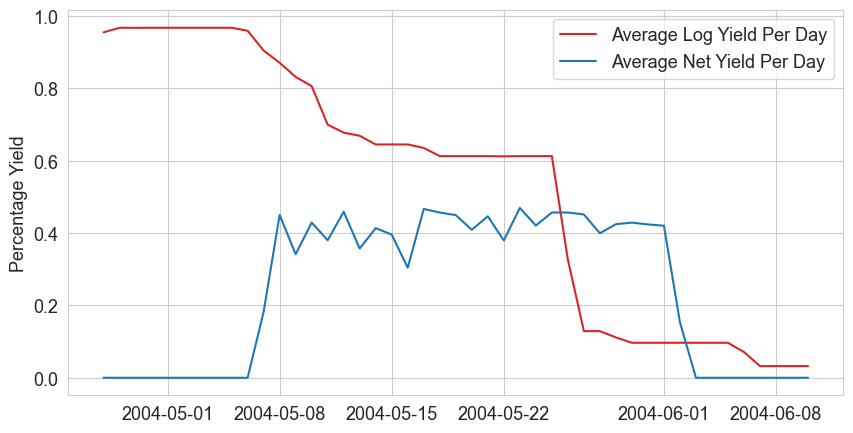

In [83]:
sns.set_style('whitegrid')
fig,ax= plt.subplots(1,1,figsize=(10,5))

ax.plot(yield_per_time[yield_per_time['Source']=='log']['Epoch_date'],
        yield_per_time[yield_per_time['Source']=='log']['Has_data'], label='Average Log Yield Per Day',
        c='tab:red')

ax.plot(yield_per_time[yield_per_time['Source']=='net']['Epoch_date'],
        yield_per_time[yield_per_time['Source']=='net']['Has_data'], label='Average Net Yield Per Day',
        c='tab:blue')


ax.set_ylabel('Percentage Yield')
ax.legend()

## Difference Plot of Node Yield

In [86]:
# Groupby average over time
yield_frame_node = yield_frame_time[['nodeid','Source',
                                     'Has_data']].groupby(['nodeid','Source'], as_index=False).mean()

# Add in height information
yield_frame_node = yield_frame_node.merge(mote_location,
                how='left',
                left_on='nodeid',
                right_on='ID')
yield_frame_node = yield_frame_node[~yield_frame_node['Height'].isna()]

# Get heights of each node
node_heights = np.sort(yield_frame_node['Height'].unique())

array([22.9, 24.8, 29.3, 31.3, 34.2, 37.7, 40.3, 42. , 42.9, 44.9, 46.6,
       49.4, 49.6, 49.8, 50. , 52.1, 53.7, 54. , 54.5, 55.2, 56.1, 57.8,
       59.1, 60.1, 61.1, 62. , 62.9, 63.5, 65.5, 66.5])

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/1162864461.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(node_heights)


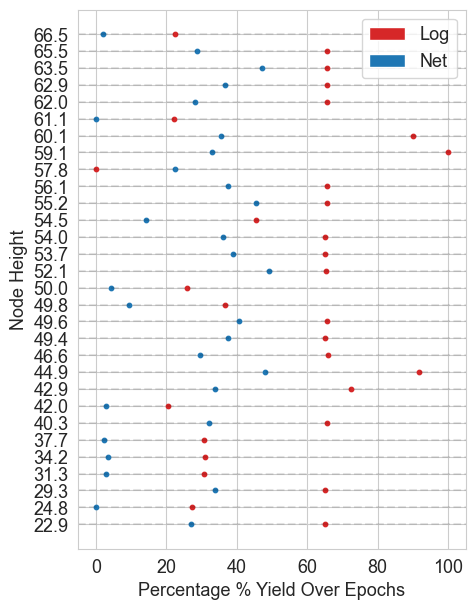

In [87]:
fig,ax = plt.subplots(figsize=(5,7))
for i,h in enumerate(node_heights):
    
    log_val = yield_frame_node[(yield_frame_node['Height']==h)&
                               (yield_frame_node['Source']=='log')]['Has_data'].values[0]
    net_val = yield_frame_node[(yield_frame_node['Height']==h)&
                               (yield_frame_node['Source']=='net')]['Has_data'].values[0]
    
    log_height = i
    net_height = i
    
    ax.scatter(log_val*100, log_height, c='tab:red', s=10)
    ax.scatter(net_val*100, net_height, c='tab:blue', s=10)
    ax.axhline(i, ls='--',alpha=0.1,c='k')
    #ax.text(x=-15,y=i-0.1,s=str(h))
ax.set_yticklabels(node_heights)
ax.set_yticks(list(range(len(node_heights))))

ax.set_xlabel('Percentage % Yield Over Epochs')
ax.set_ylabel('Node Height')#,loc="top",rotation="horizontal")

# Legend
from matplotlib.patches import Patch

custom_lines = [#Line2D([0], [0], color='tab:red', lw=4),
                #Line2D([0], [0], color='tab:blue', lw=4)
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

custom_patches  = [
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

ax.legend(custom_patches, ['Log', 'Net'])

plt.show()

## Average Difference for Node Lifetime Indicator

In [88]:
# Getting how long each node transmitted (in no. of days)

node_survival_times = yield_frame_time[['nodeid','Source',
                                        'Has_data','Epoch_date']].groupby(['nodeid','Source','Epoch_date'],
                                                            as_index=False).sum() 
node_survival_times['Alive'] = node_survival_times['Has_data']>0
node_survival_times = node_survival_times[['nodeid',
                                           'Source',
                                           'Alive']].groupby(['nodeid','Source'],
                                                            as_index=False).sum()

In [89]:
node_survival_times = node_survival_times.merge(mote_location,
                how='left',
                left_on='nodeid',
                right_on='ID')
node_survival_times = node_survival_times[~node_survival_times['Height'].isna()]

Plotting

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_43288/3502670965.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(node_heights)


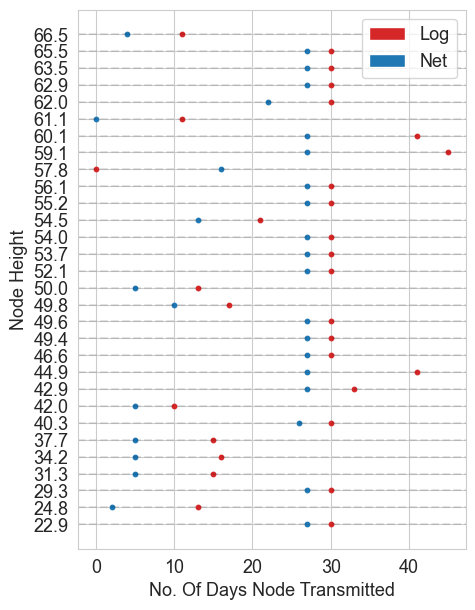

In [90]:
fig,ax = plt.subplots(figsize=(5,7))
for i,h in enumerate(node_heights):
    
    log_val = node_survival_times[(node_survival_times['Height']==h)&
                               (node_survival_times['Source']=='log')]['Alive'].values[0]
    net_val = node_survival_times[(node_survival_times['Height']==h)&
                               (node_survival_times['Source']=='net')]['Alive'].values[0]
    
    log_height = i
    net_height = i
    
    ax.scatter(log_val, log_height, c='tab:red', s=10)
    ax.scatter(net_val, net_height, c='tab:blue', s=10)
    ax.axhline(i, ls='--',alpha=0.1,c='k')
    #ax.text(x=-15,y=i-0.1,s=str(h))
ax.set_yticklabels(node_heights)
ax.set_yticks(list(range(len(node_heights))))

ax.set_xlabel('No. Of Days Node Transmitted')
ax.set_ylabel('Node Height')#,loc="top",rotation="horizontal")

# Legend
from matplotlib.patches import Patch

custom_lines = [#Line2D([0], [0], color='tab:red', lw=4),
                #Line2D([0], [0], color='tab:blue', lw=4)
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

custom_patches  = [
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

ax.legend(custom_patches, ['Log', 'Net'])

plt.show()